<a href="https://colab.research.google.com/github/dityokreshna/multi-classification-network/blob/main/multiclassification%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nilai K 	 accuracy 	 precision 	 recall
   


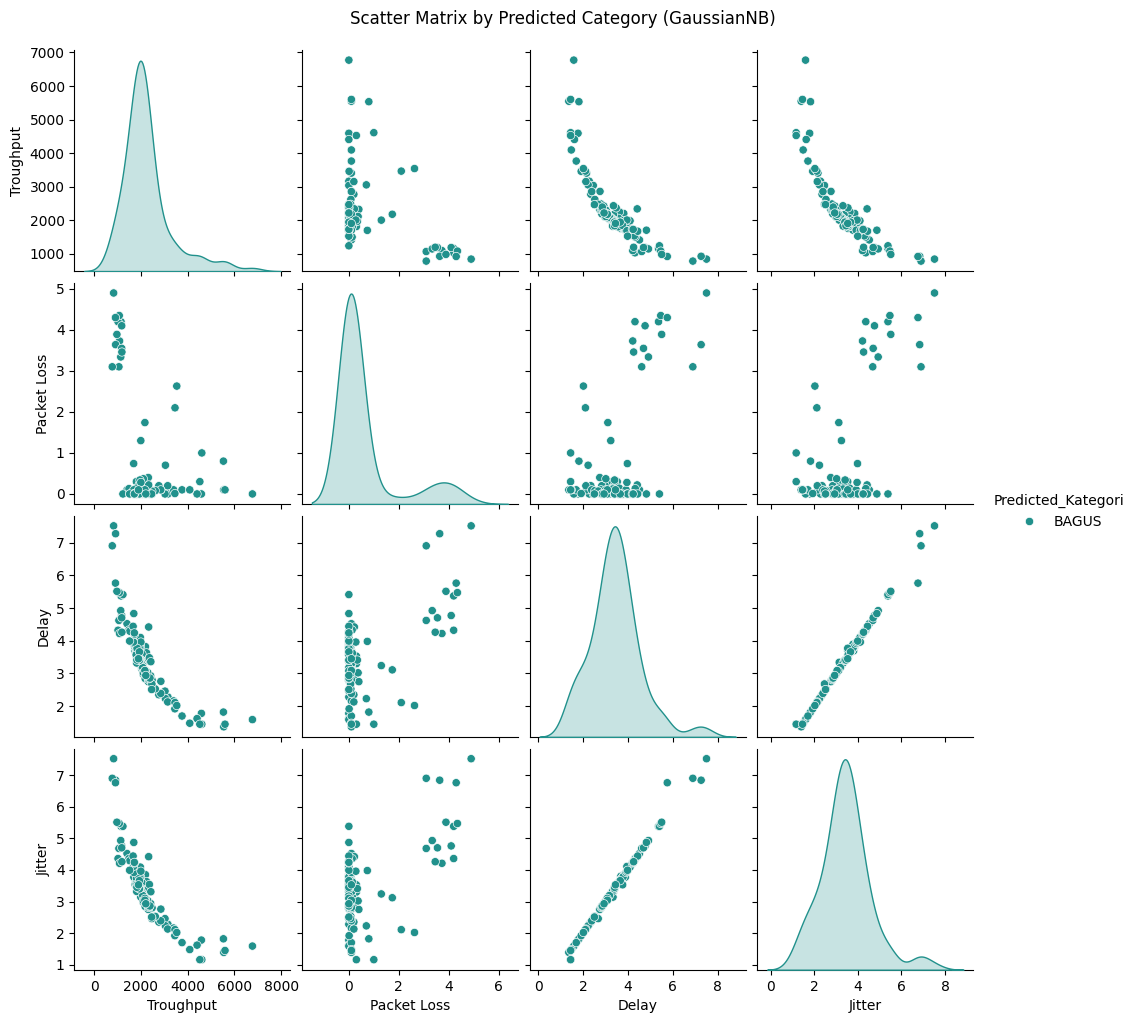

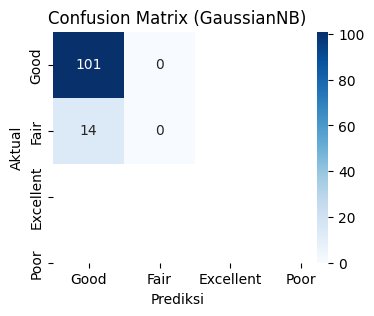

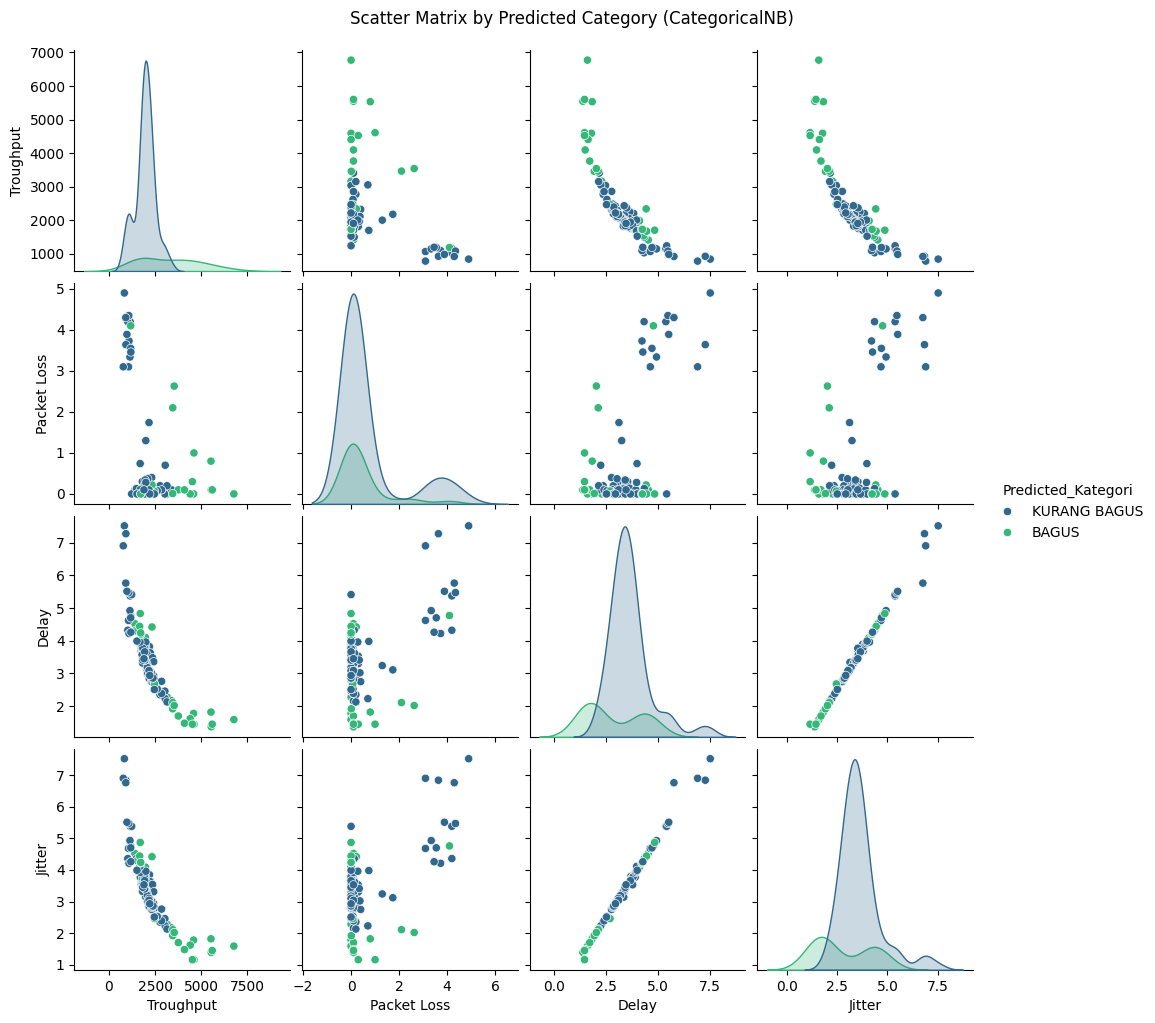

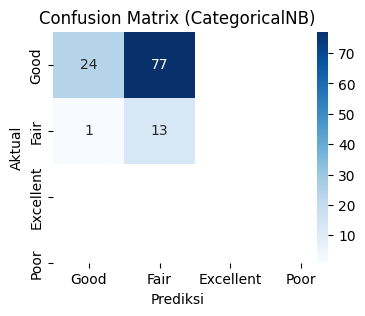

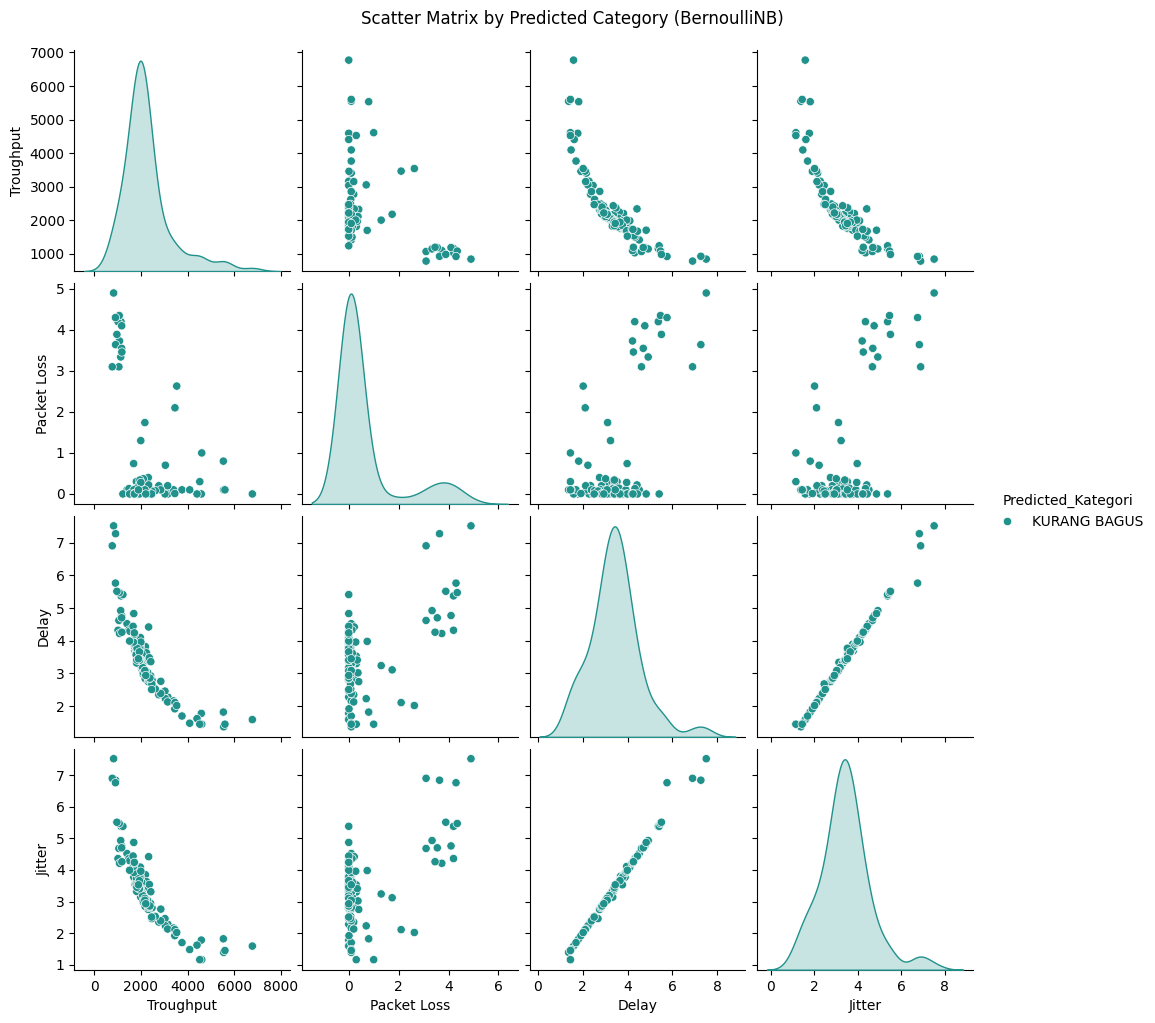

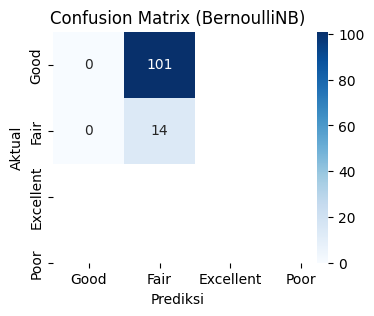

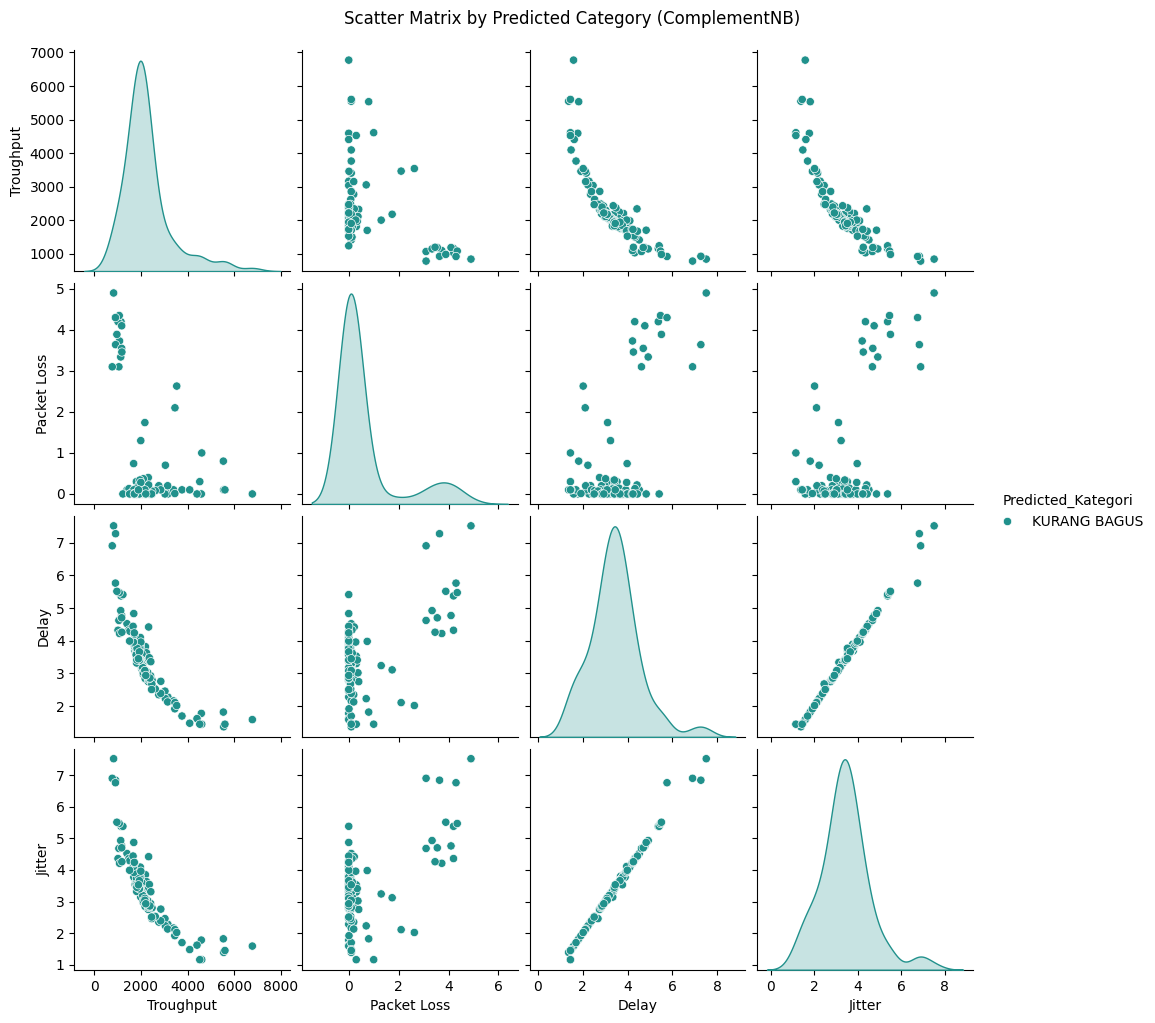

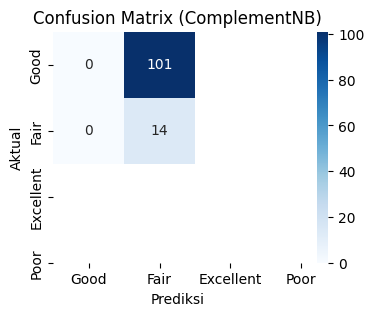

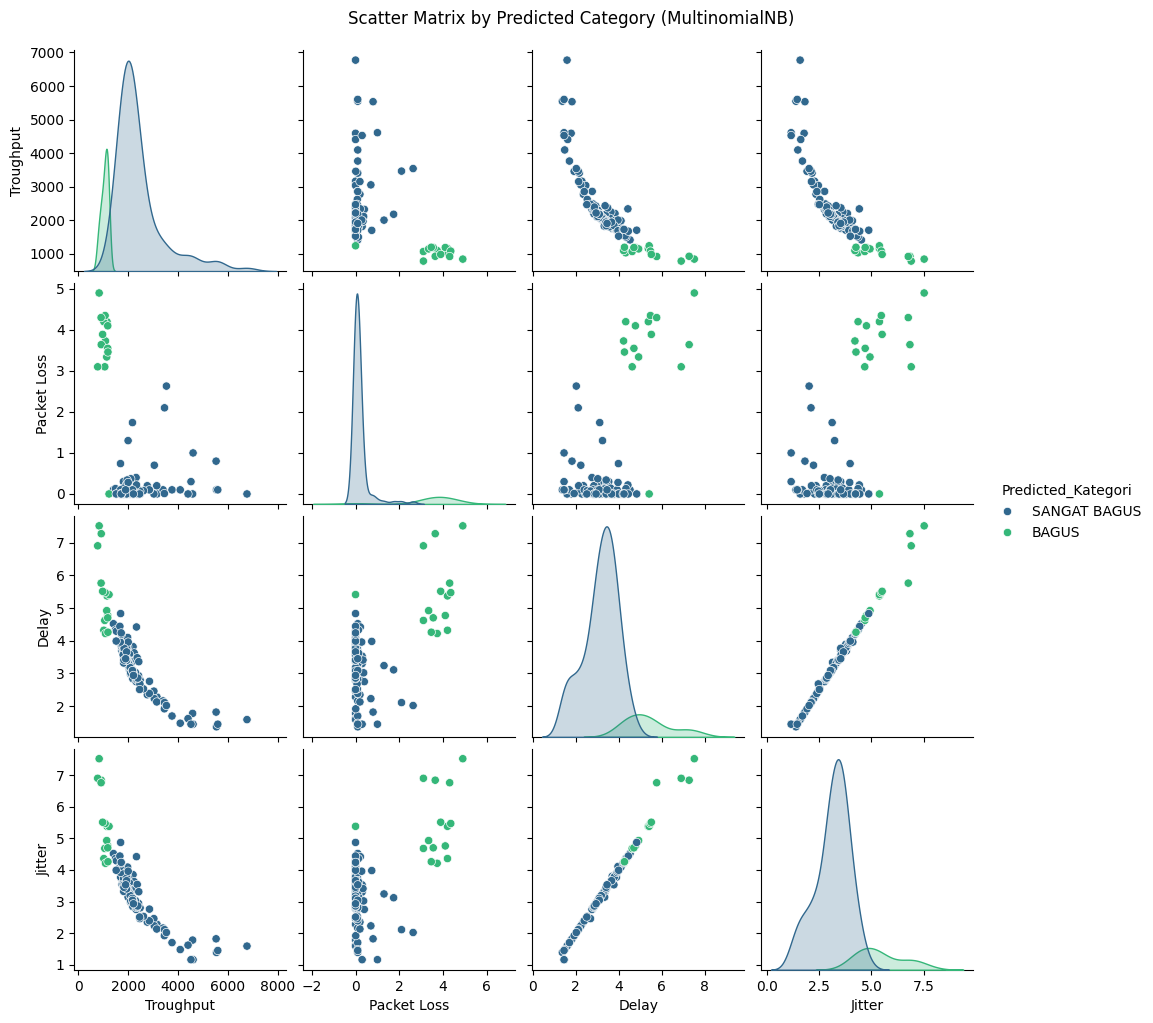

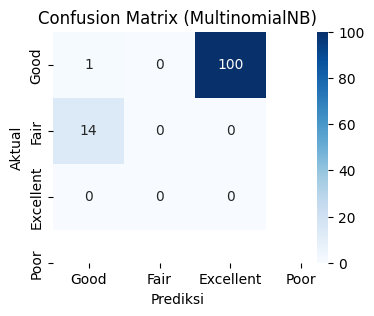

In [11]:
# prompt: create naive bayes multi-classification for qos input (packet loss, jitter, troughput, delay) output (very nice, nice, cheap nice, poor) with excel data training and excel data testing on different files

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

naive_bayes_method = [GaussianNB(), CategoricalNB(), BernoulliNB(),ComplementNB(), MultinomialNB()]

# Load training data from Excel
train_data = pd.read_excel('data_train_qos.xlsx')  # Replace with your training file name
# print(train_data)

X_train = train_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']] # Assuming these are column names
y_train = train_data['Kategori'] # Assuming the QoS column is your target variable

# Load testing data from Excel
test_data = pd.read_excel('data_test_qos.xlsx')  # Replace with your testing file name
X_test = test_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']] # Use the same column names
y_test = test_data['Kategori']
print("Nilai K",'\t',"accuracy", '\t',"precision", '\t',"recall")
print("   ")
for x in naive_bayes_method:
  # Initialize and train the Gaussian Naive Bayes model
  model = x
  model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = model.predict(X_test)
  # precision = precision_score(y_test, y_pred,average="macro",zero_division= 1)
  # accuracy = accuracy_score(y_test, y_pred)
  # recall = recall_score(y_test, y_pred,average="macro",zero_division= 1)
  # print(x,'\t',accuracy, '\t','\t',precision,'\t',recall)
  # print("   ")
  # Evaluate the model
  # print(confusion_matrix(y_test, y_pred))
  # print(classification_report(y_test, y_pred))

  # Create a DataFrame for plotting with predicted categories
  plot_df = X_test.copy()
  plot_df['Predicted_Kategori'] = y_pred

  # Create and display the scatter matrix
  sns.pairplot(plot_df, hue='Predicted_Kategori', palette='viridis')
  plt.suptitle(f'Scatter Matrix by Predicted Category ({type(x).__name__})', y=1.02)
  plt.show()


  #===================== Confusion Matrix ==================

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(4, 3))  # Set figure size to 4x4
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              # xticklabels=['Very Good', 'Good', 'Not Good', 'Bad'],
              # yticklabels=['Very Good', 'Good', 'Not Good', 'Bad'])
              xticklabels=['Good', 'Fair', 'Excellent', 'Poor'],
              yticklabels=['Good', 'Fair', 'Excellent', 'Poor'])

  # plt.xlabel('Predicted')
  # plt.ylabel('Actual')
  plt.xlabel('Prediksi')
  plt.ylabel('Aktual')
  plt.title(f'Confusion Matrix ({type(x).__name__})')
  plt.show()


  #===================== Confusion Matrix ==================

# Example of predicting for a single data point:
# new_data = [[0.1, 5, 100, 20]]  # Replace with your new data point
# prediction = model.predict(new_data)
# print("Prediction:", prediction)



Nilai K 	 accuracy 	 precision 	 recall
   


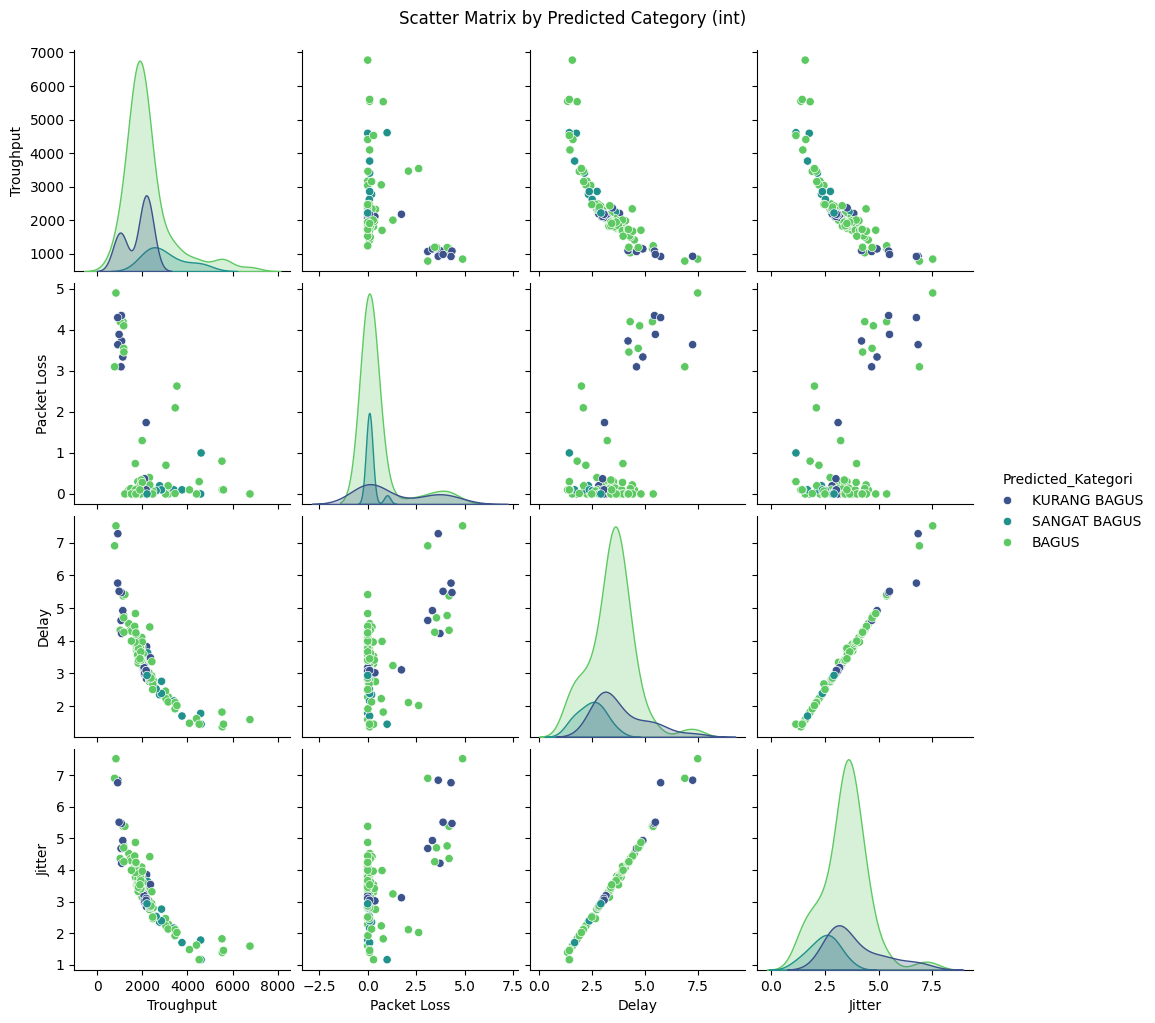

1 	 0.7130434782608696 	 0.41598915989159896 	 0.7475247524752474
   


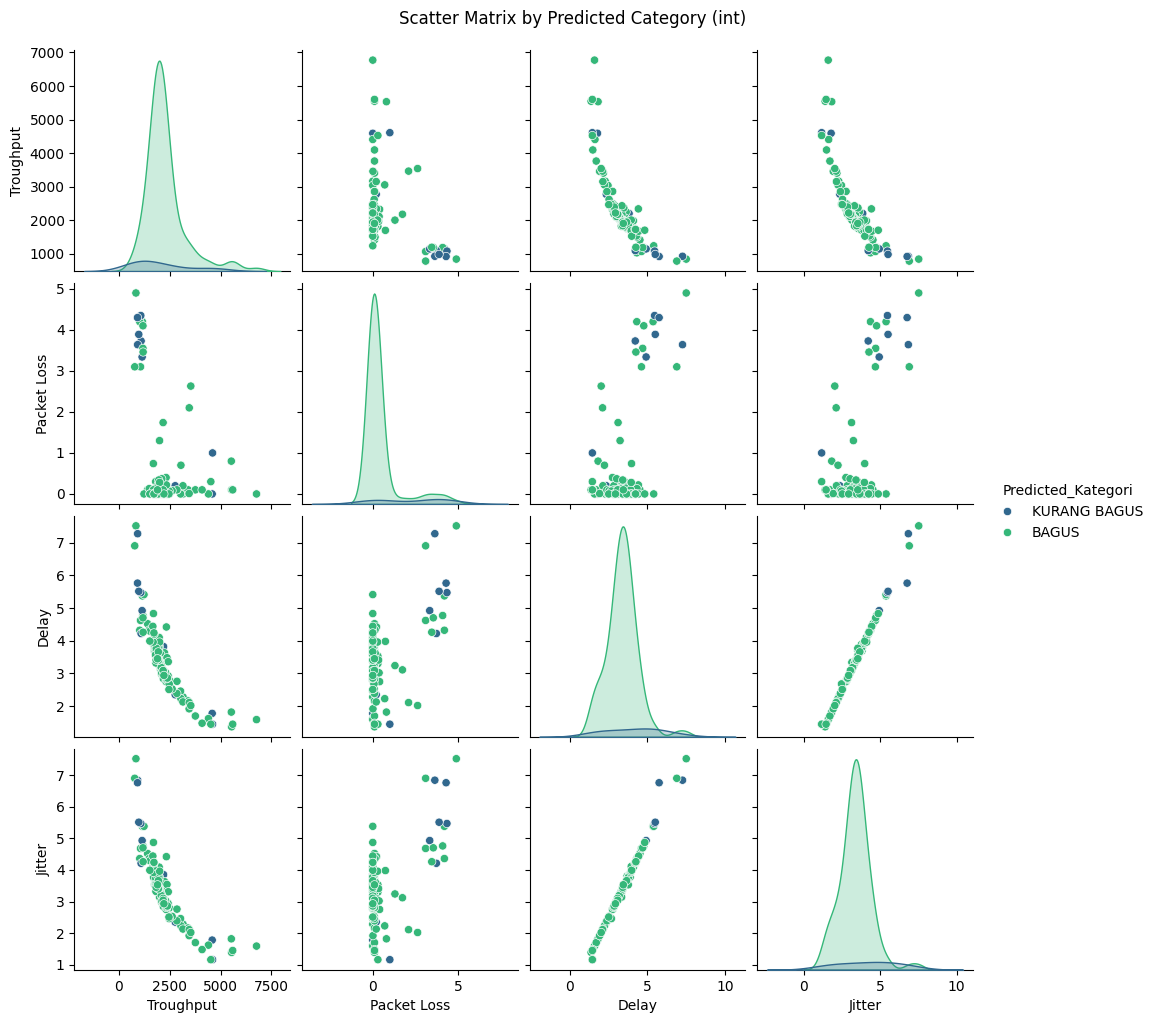

2 	 0.8869565217391304 	 0.7342657342657343 	 0.6895332390381895
   


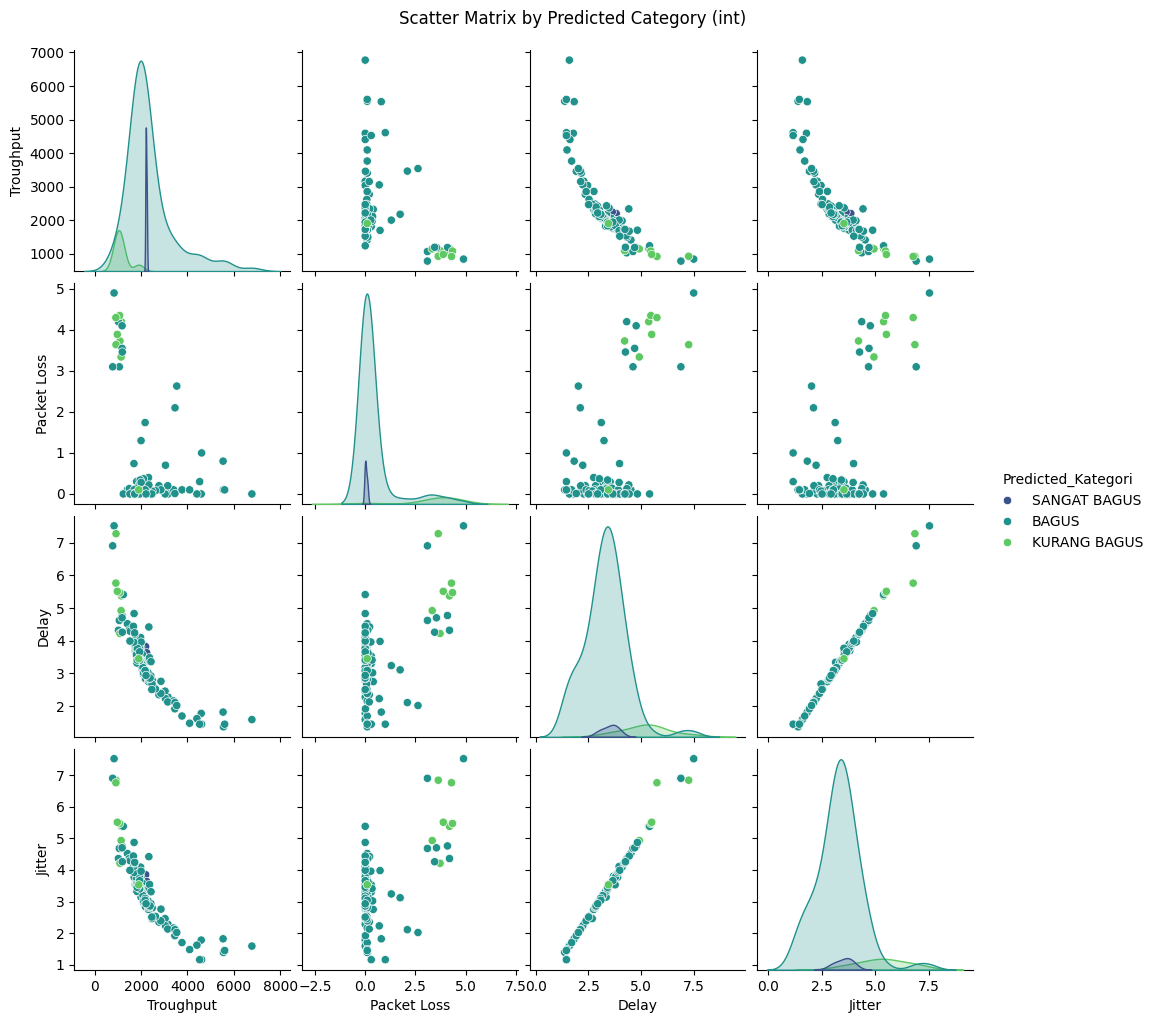

3 	 0.9043478260869565 	 0.6025641025641025 	 0.8201320132013201
   


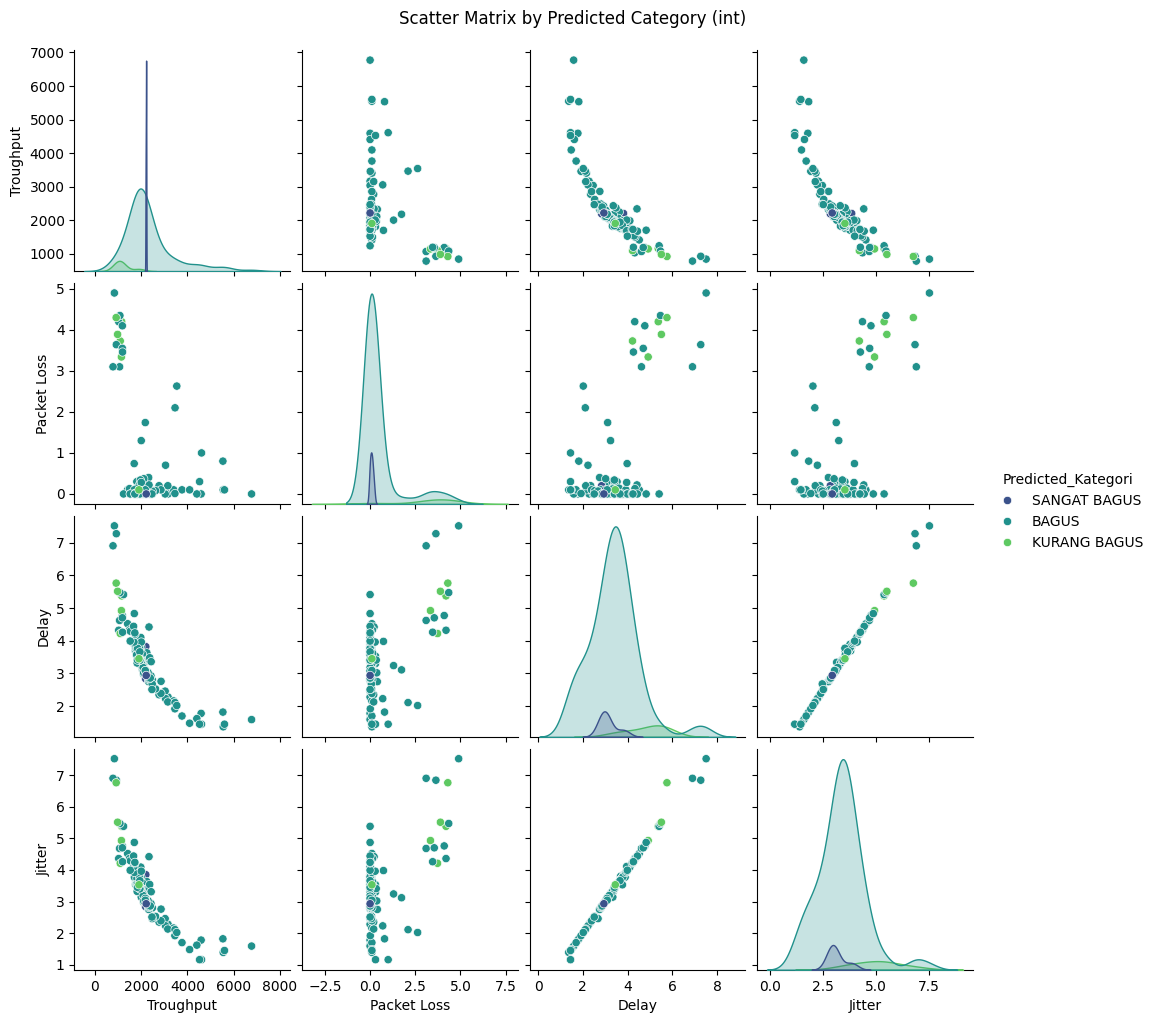

4 	 0.8695652173913043 	 0.5822649572649573 	 0.7659123055162659
   


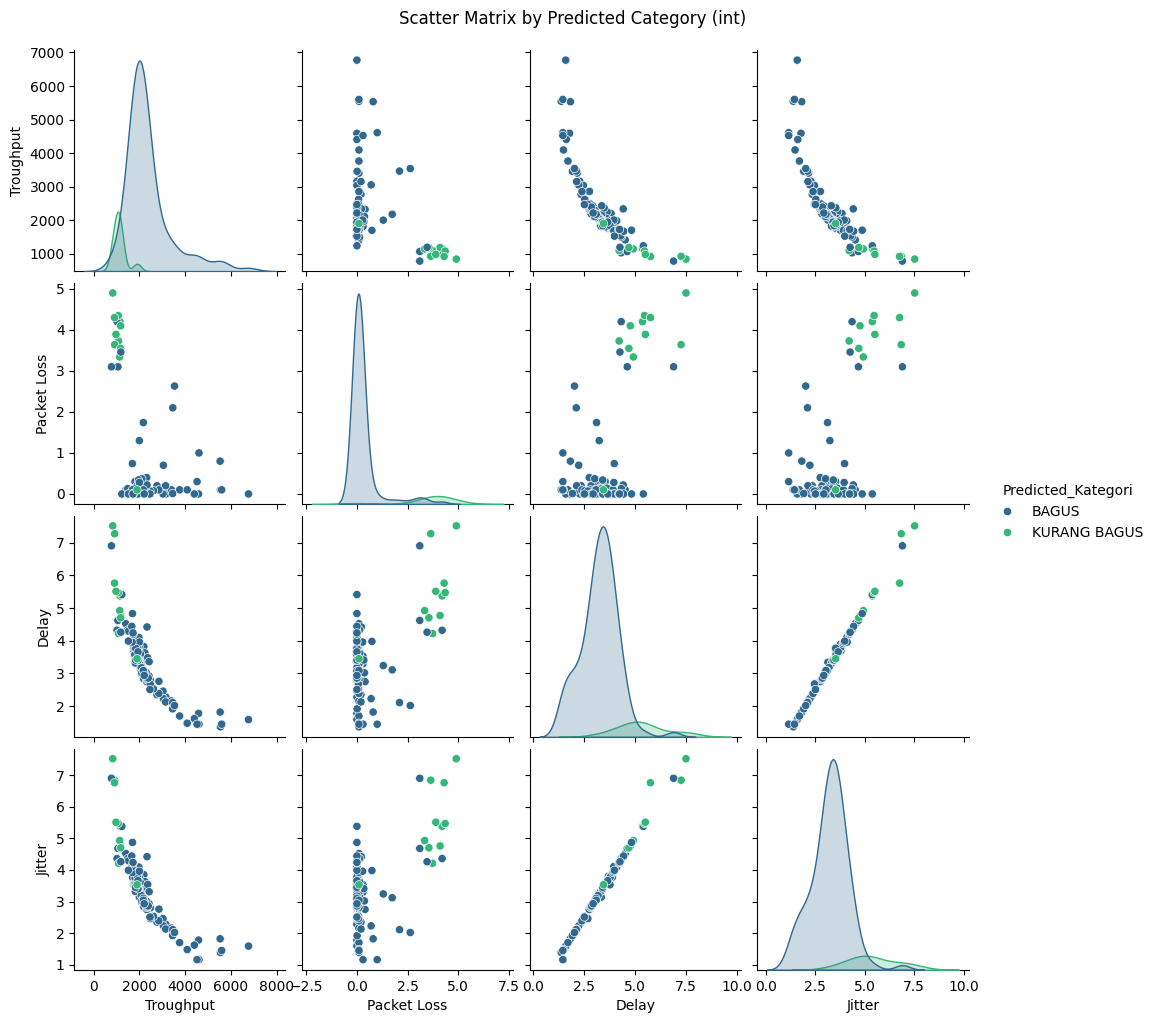

5 	 0.9565217391304348 	 0.9353146853146853 	 0.8521923620933523
   


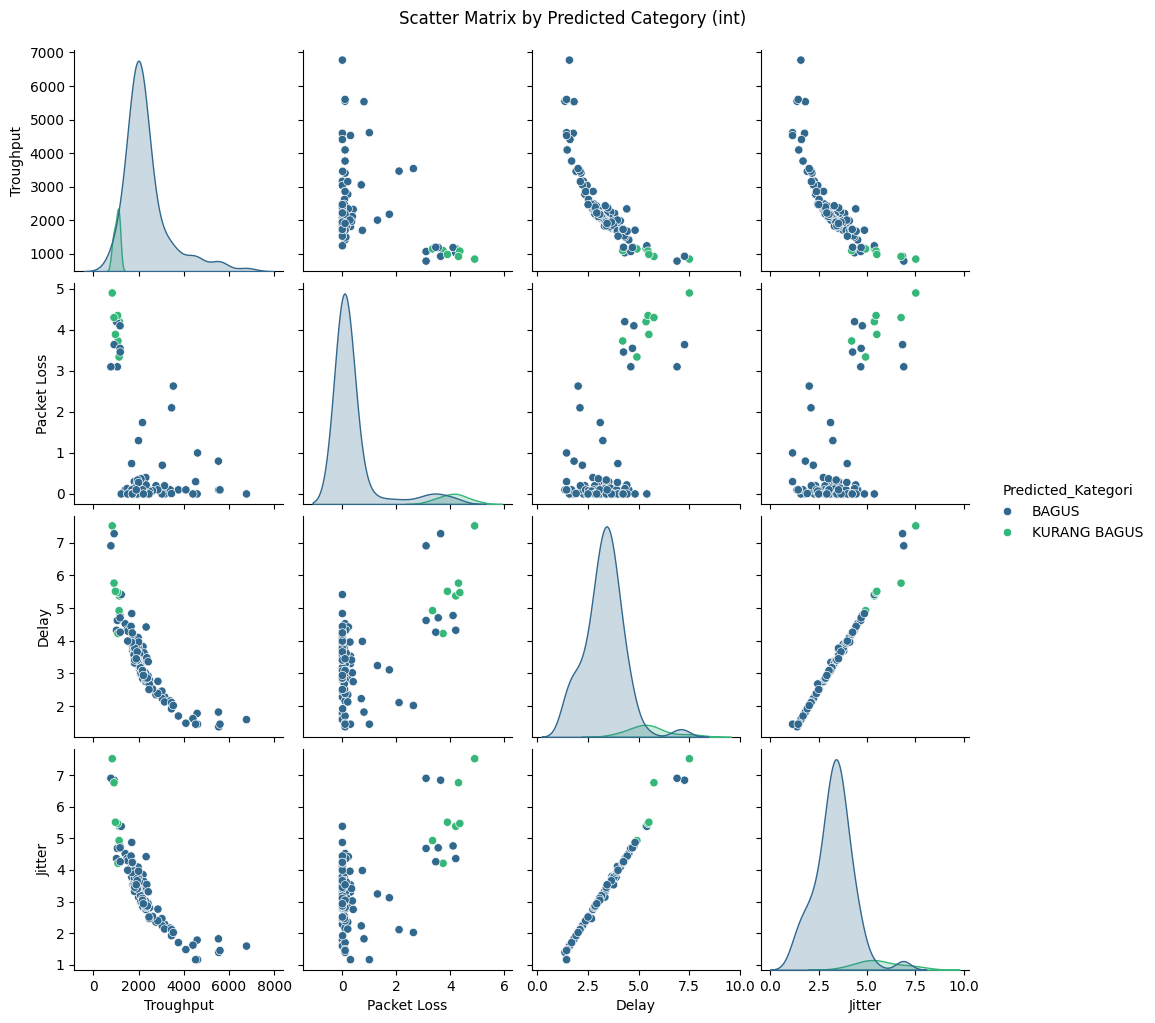

6 	 0.9391304347826087 	 0.9675925925925926 	 0.75
   


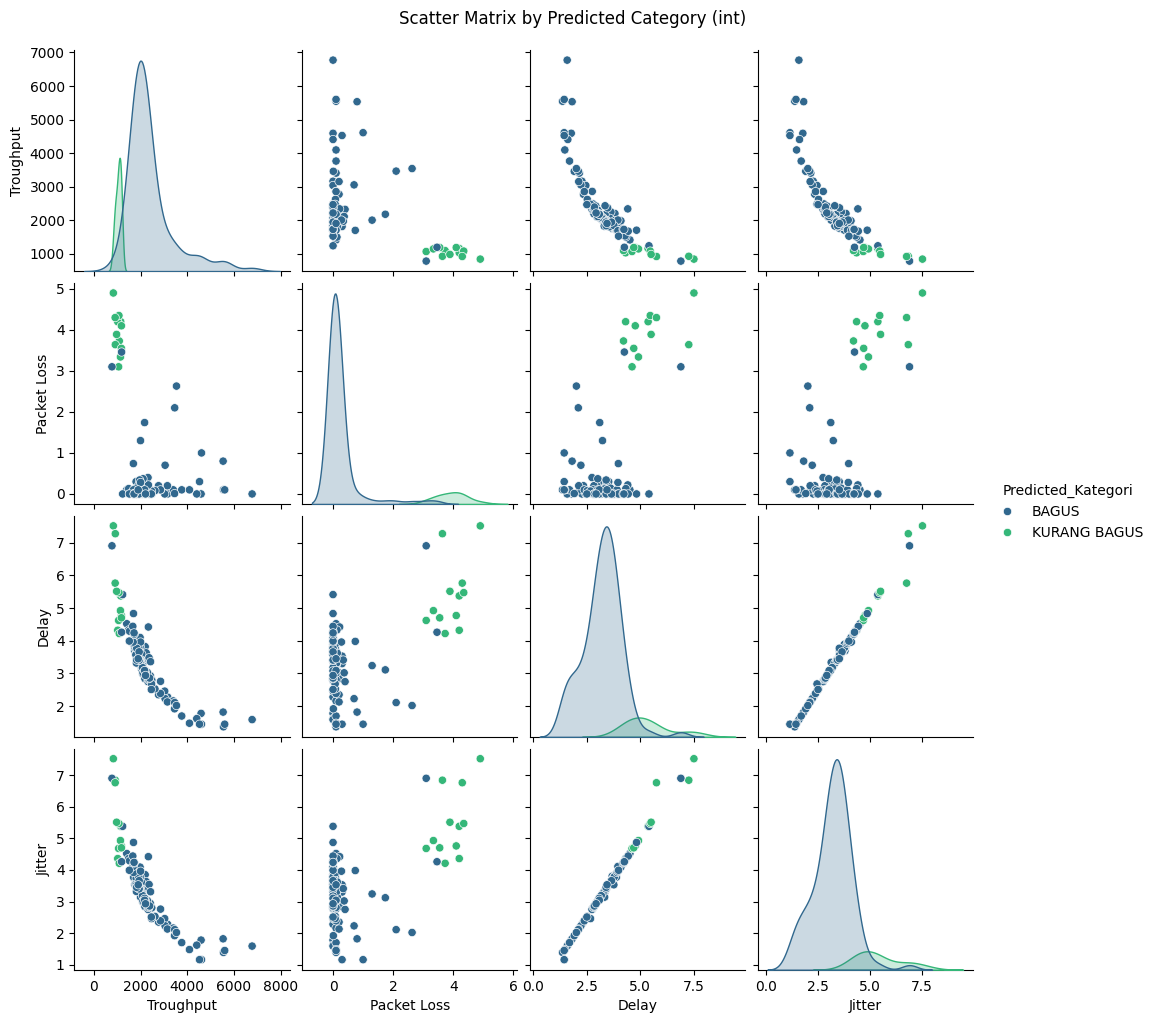

7 	 0.9826086956521739 	 0.9902912621359223 	 0.9285714285714286
   


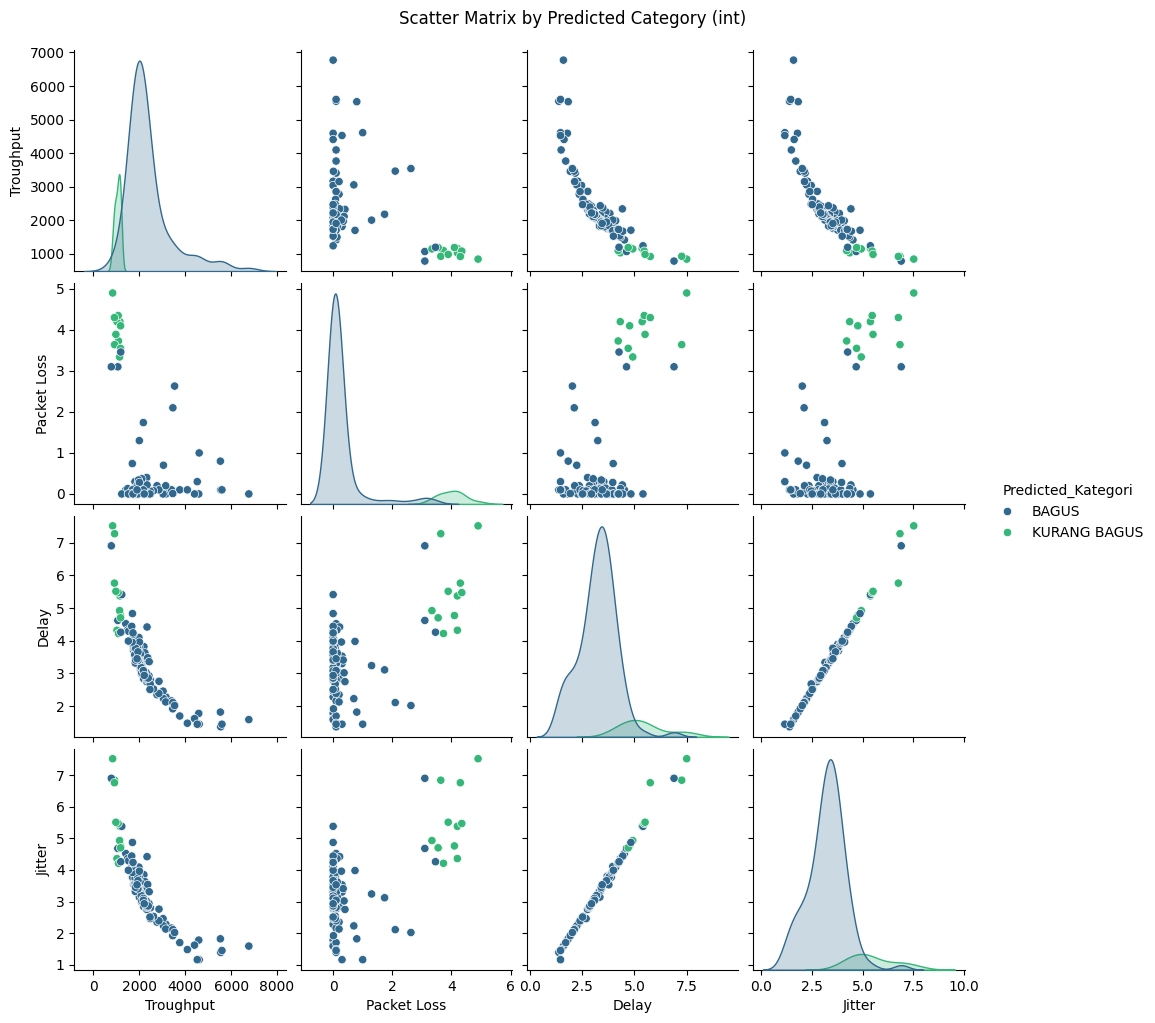

8 	 0.9739130434782609 	 0.9855769230769231 	 0.8928571428571428
   


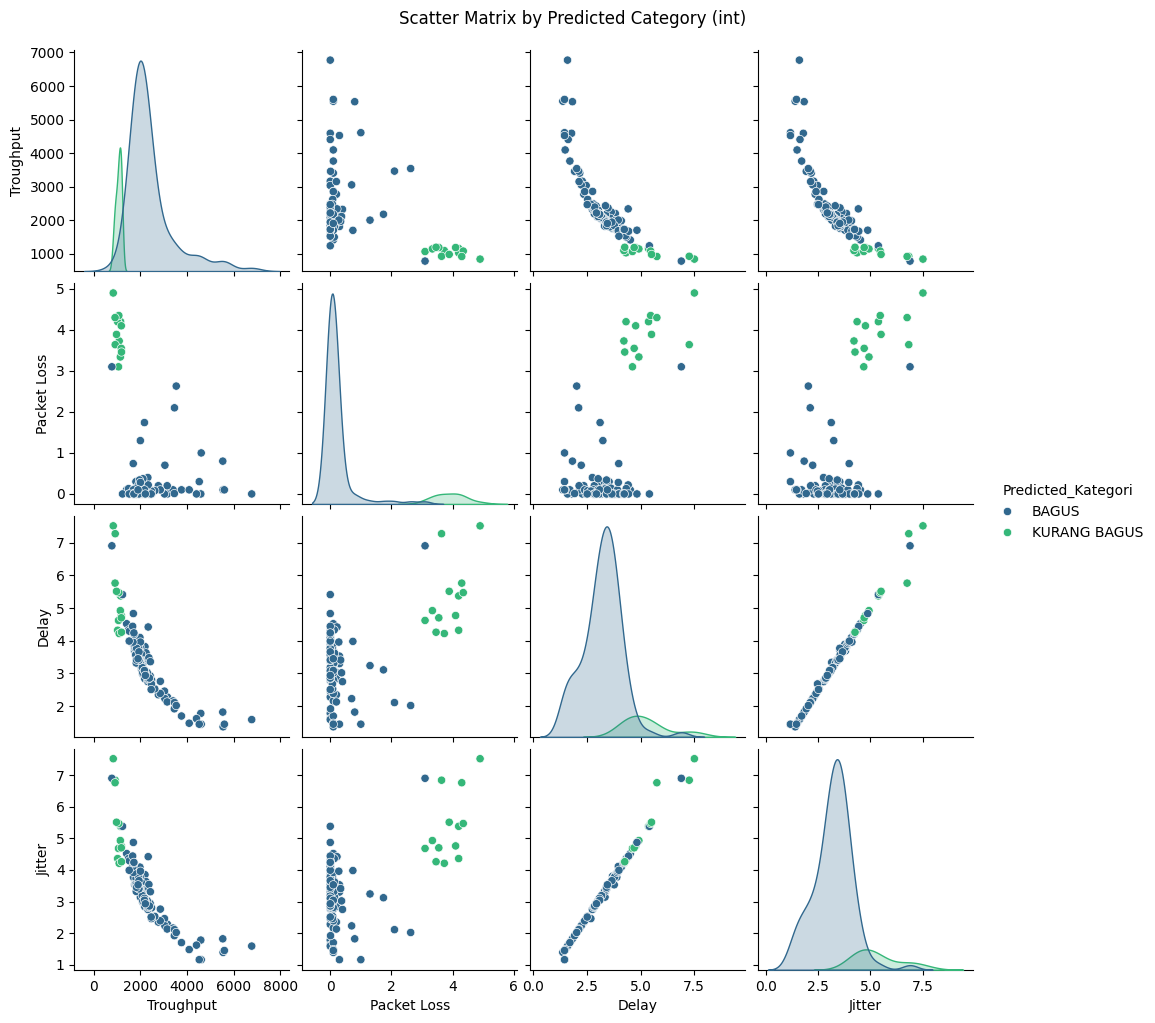

9 	 0.991304347826087 	 0.9950980392156863 	 0.9642857142857143
   


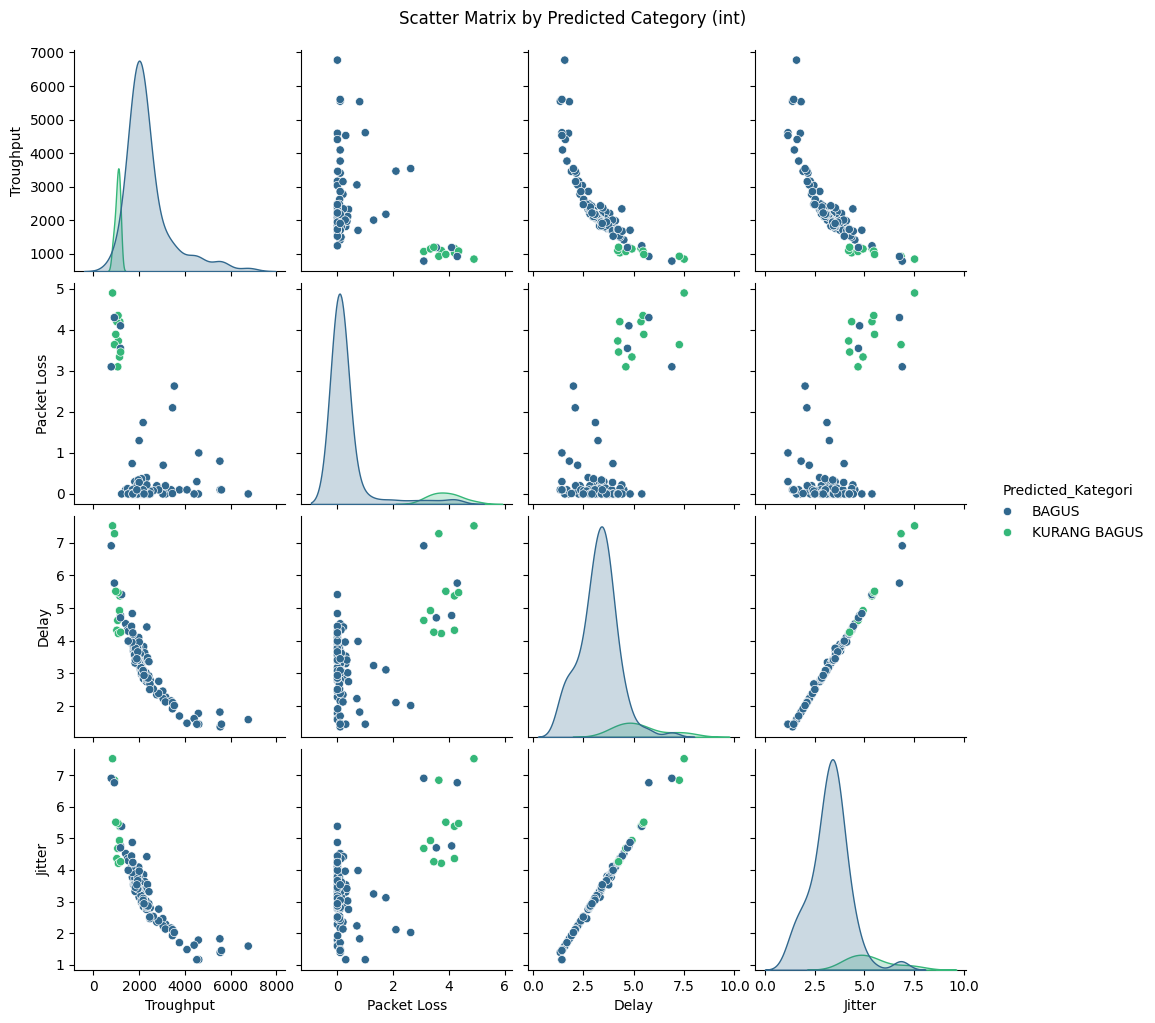

10 	 0.9652173913043478 	 0.980952380952381 	 0.8571428571428572
   


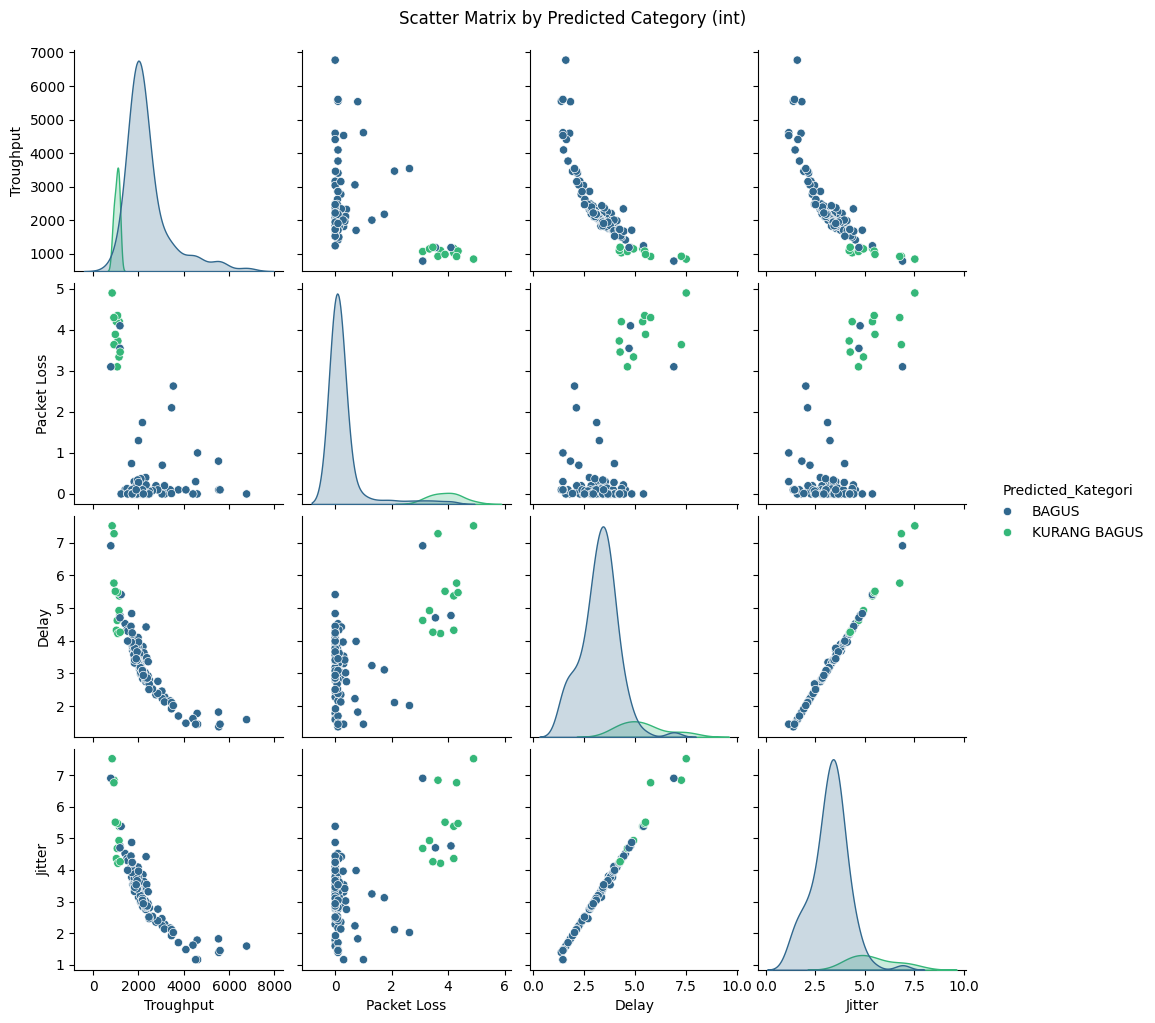

11 	 0.9739130434782609 	 0.9855769230769231 	 0.8928571428571428
   


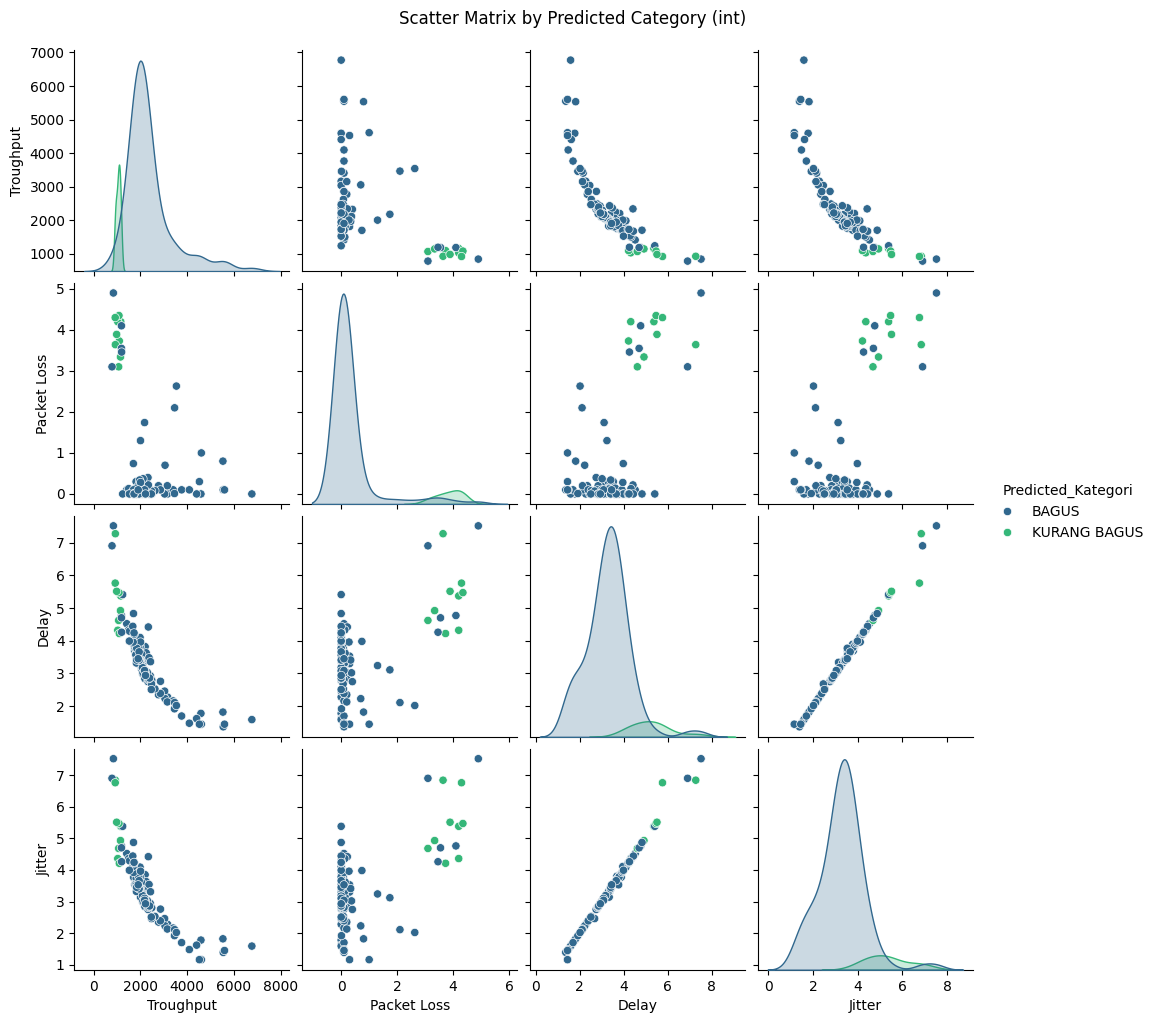

12 	 0.9565217391304348 	 0.9764150943396226 	 0.8214285714285714
   


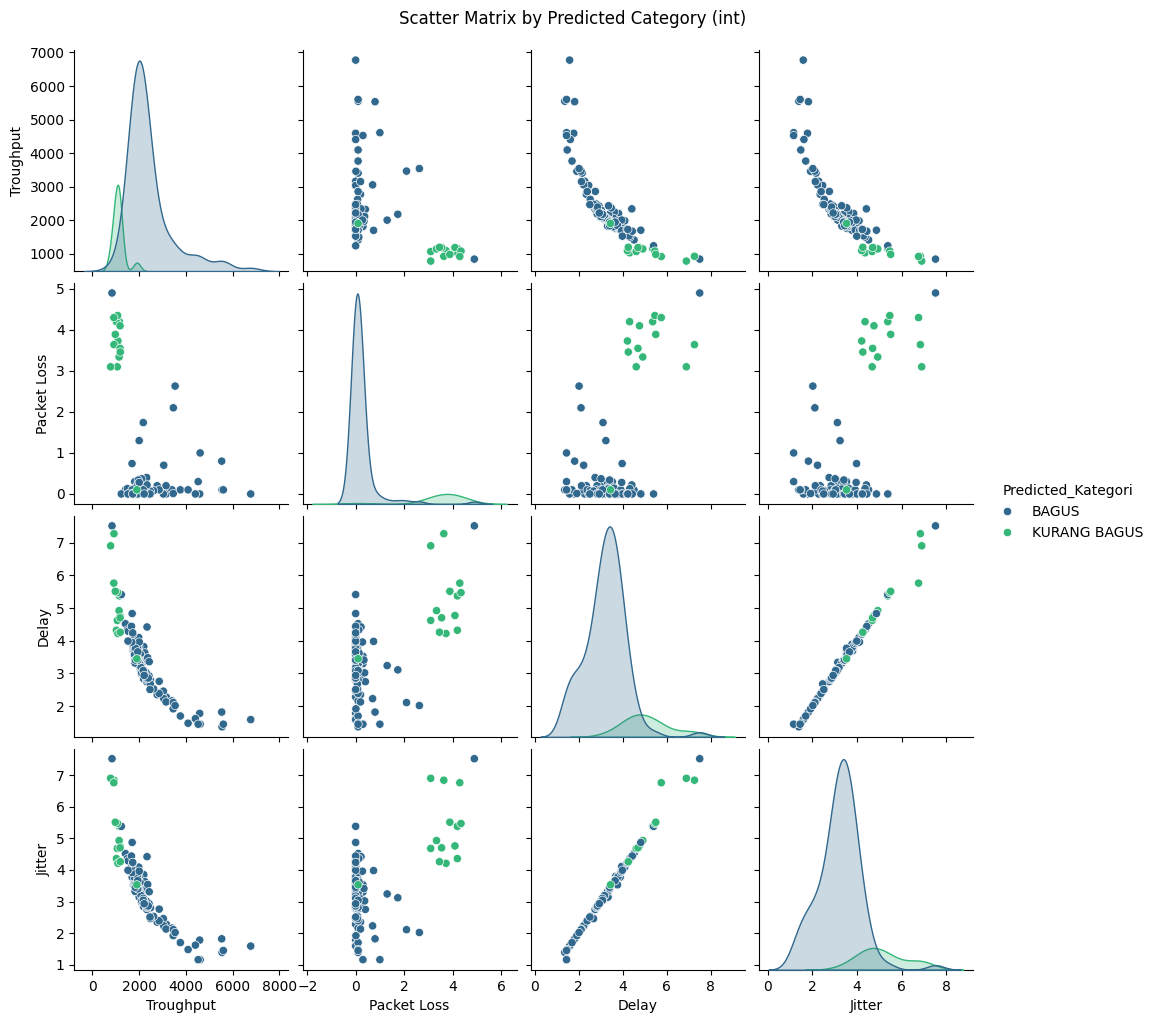

13 	 0.9826086956521739 	 0.9593352192362093 	 0.9593352192362093
   


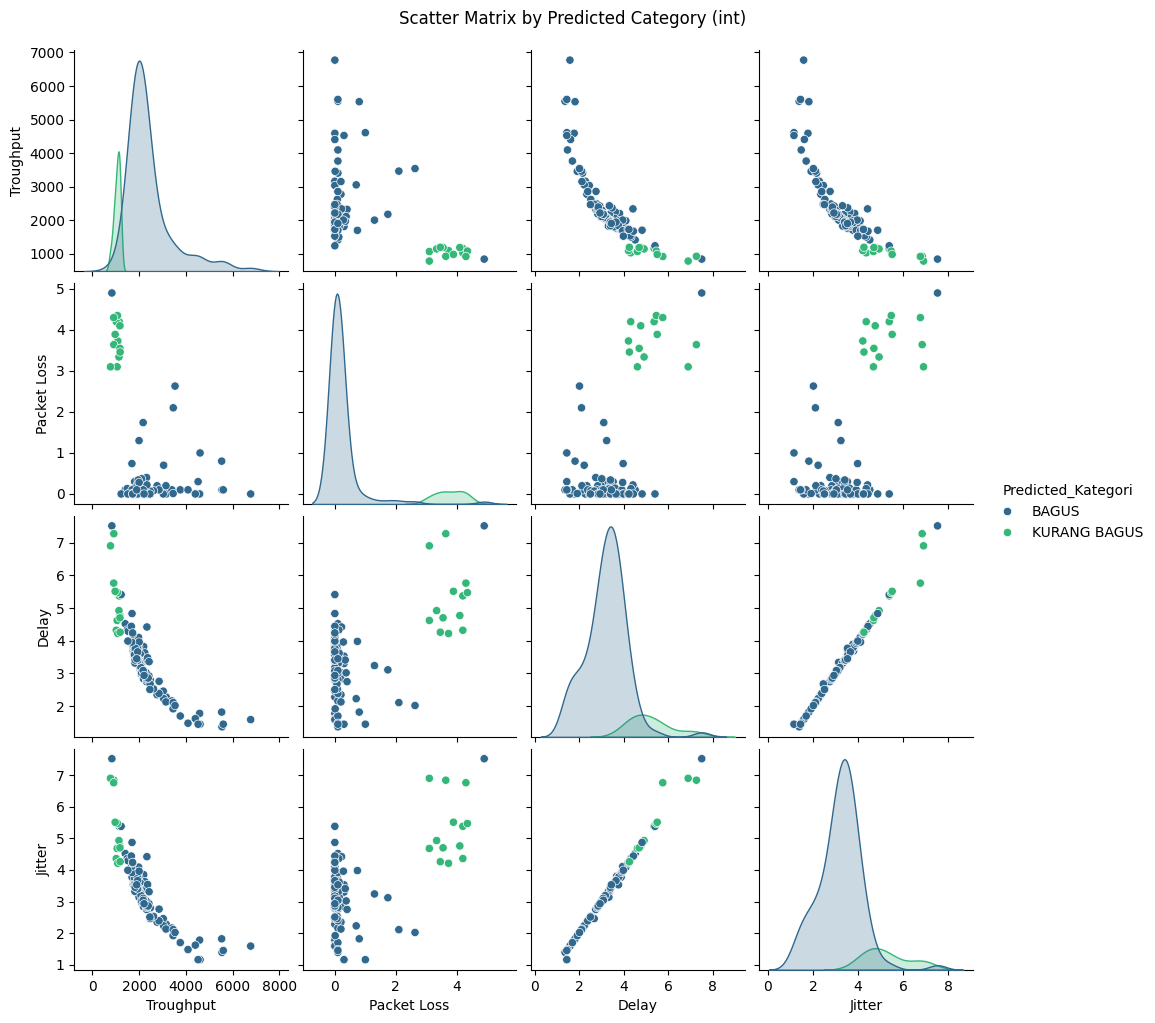

14 	 0.991304347826087 	 0.9950980392156863 	 0.9642857142857143
   


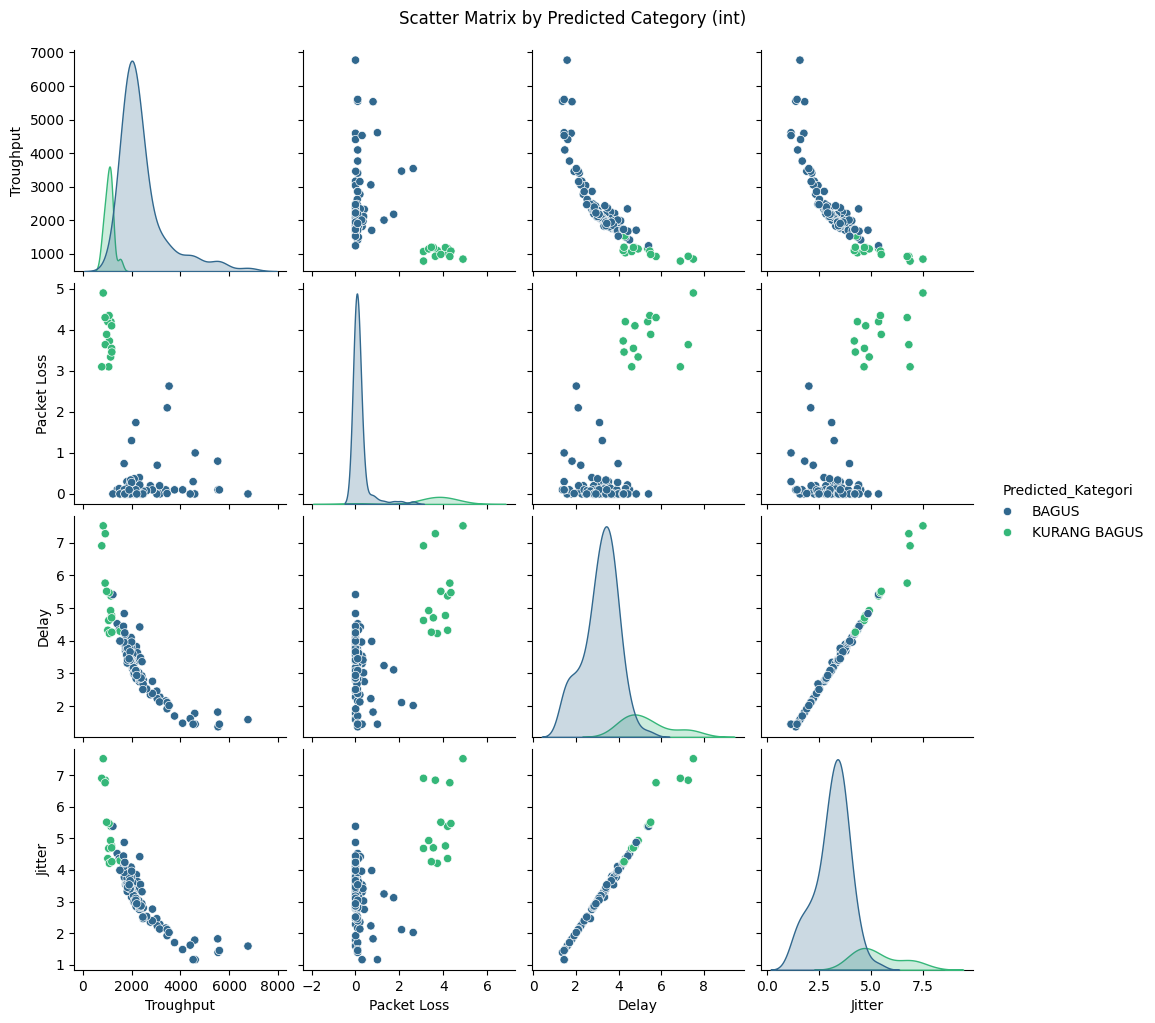

15 	 0.991304347826087 	 0.9666666666666667 	 0.995049504950495
   


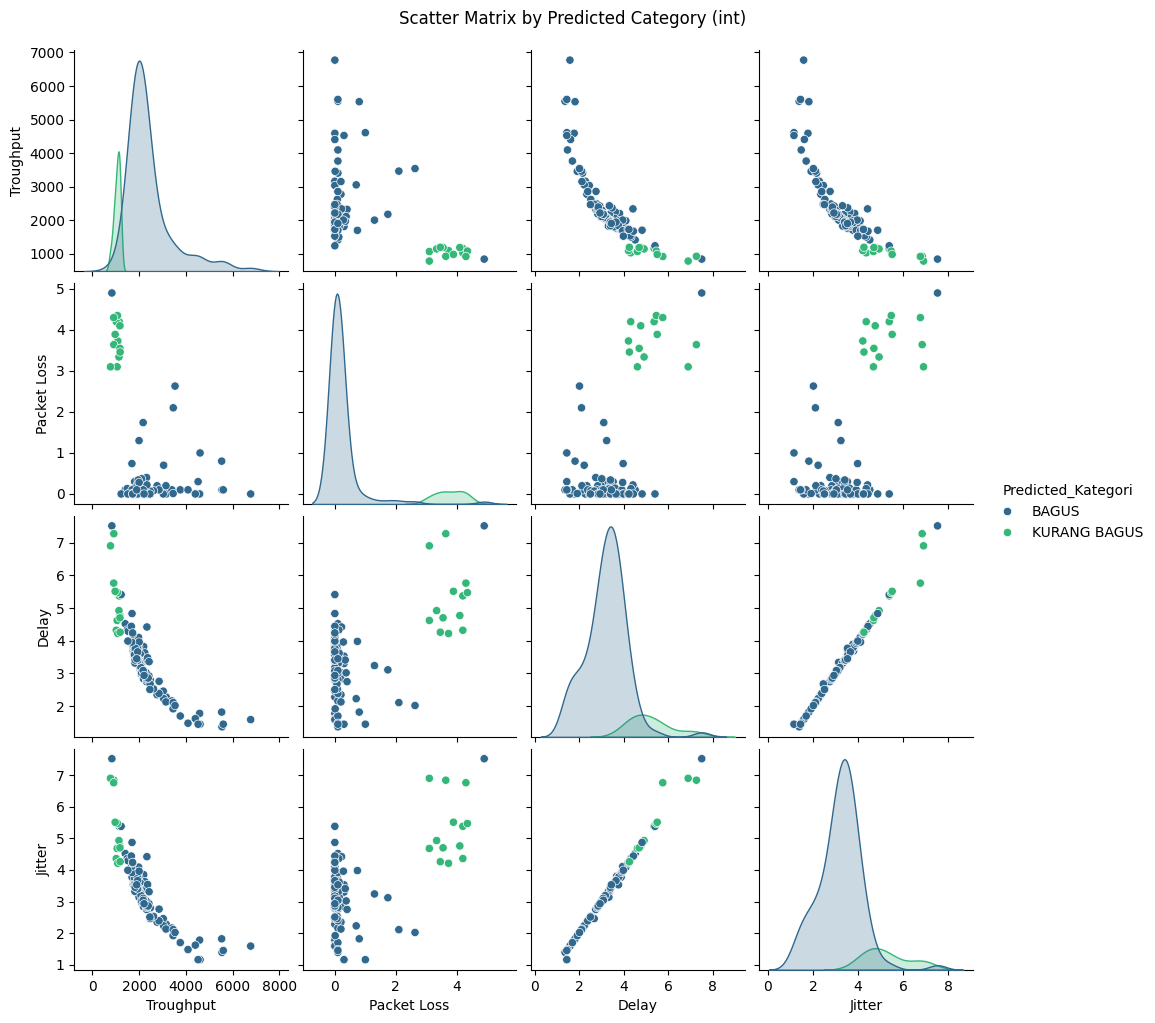

16 	 0.991304347826087 	 0.9950980392156863 	 0.9642857142857143
   


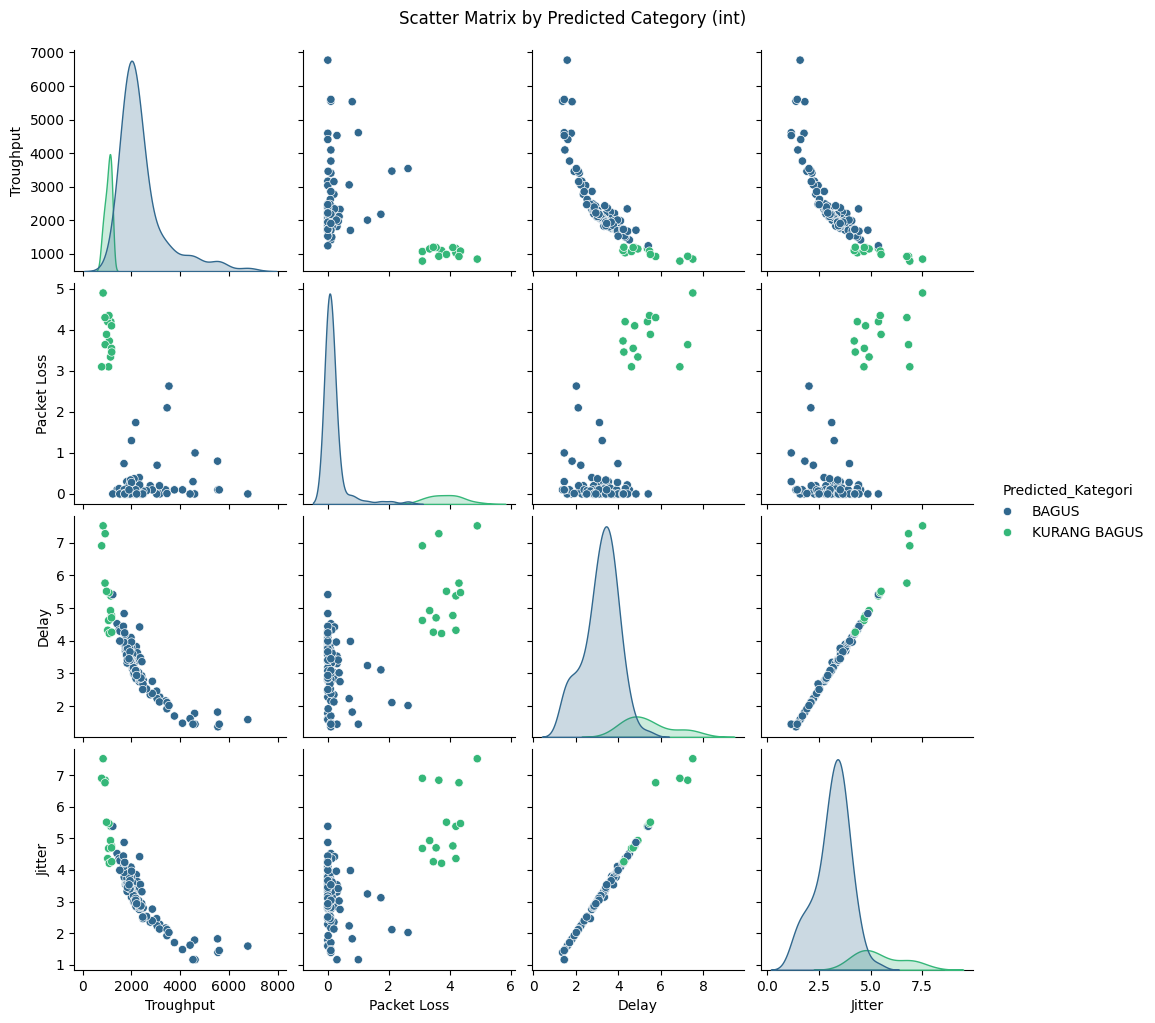

17 	 1.0 	 1.0 	 1.0
   


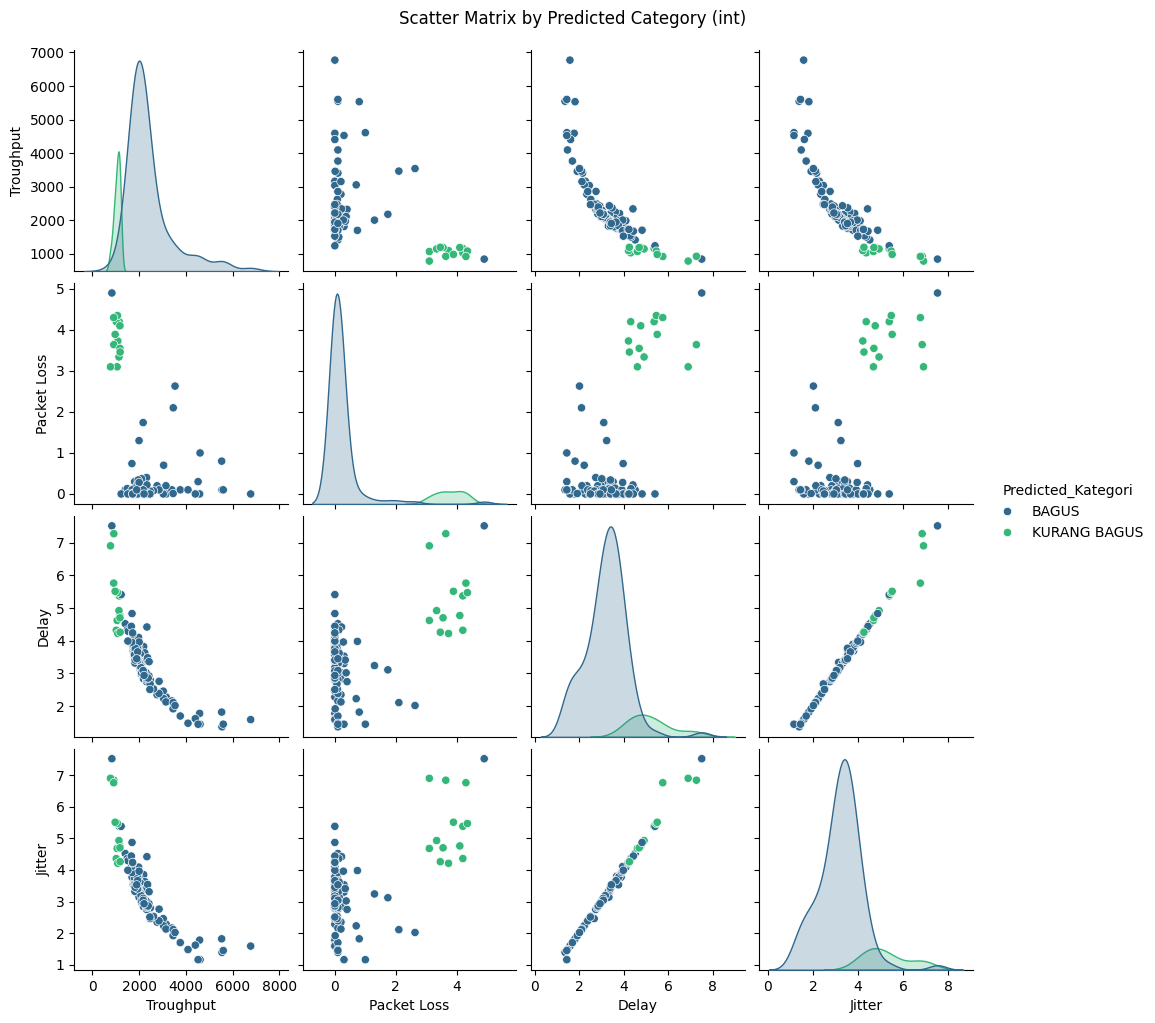

18 	 0.991304347826087 	 0.9950980392156863 	 0.9642857142857143
   


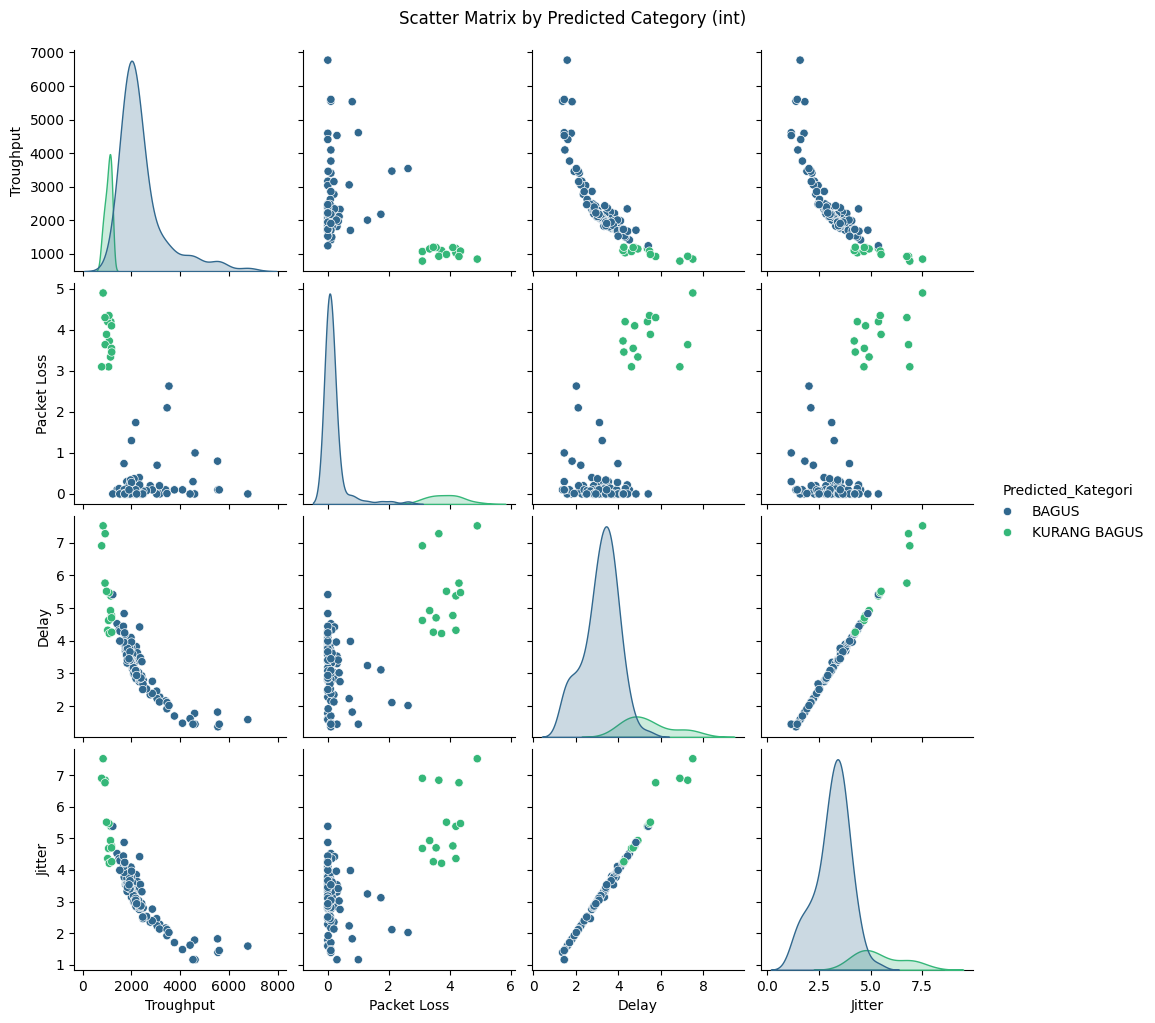

19 	 1.0 	 1.0 	 1.0
   


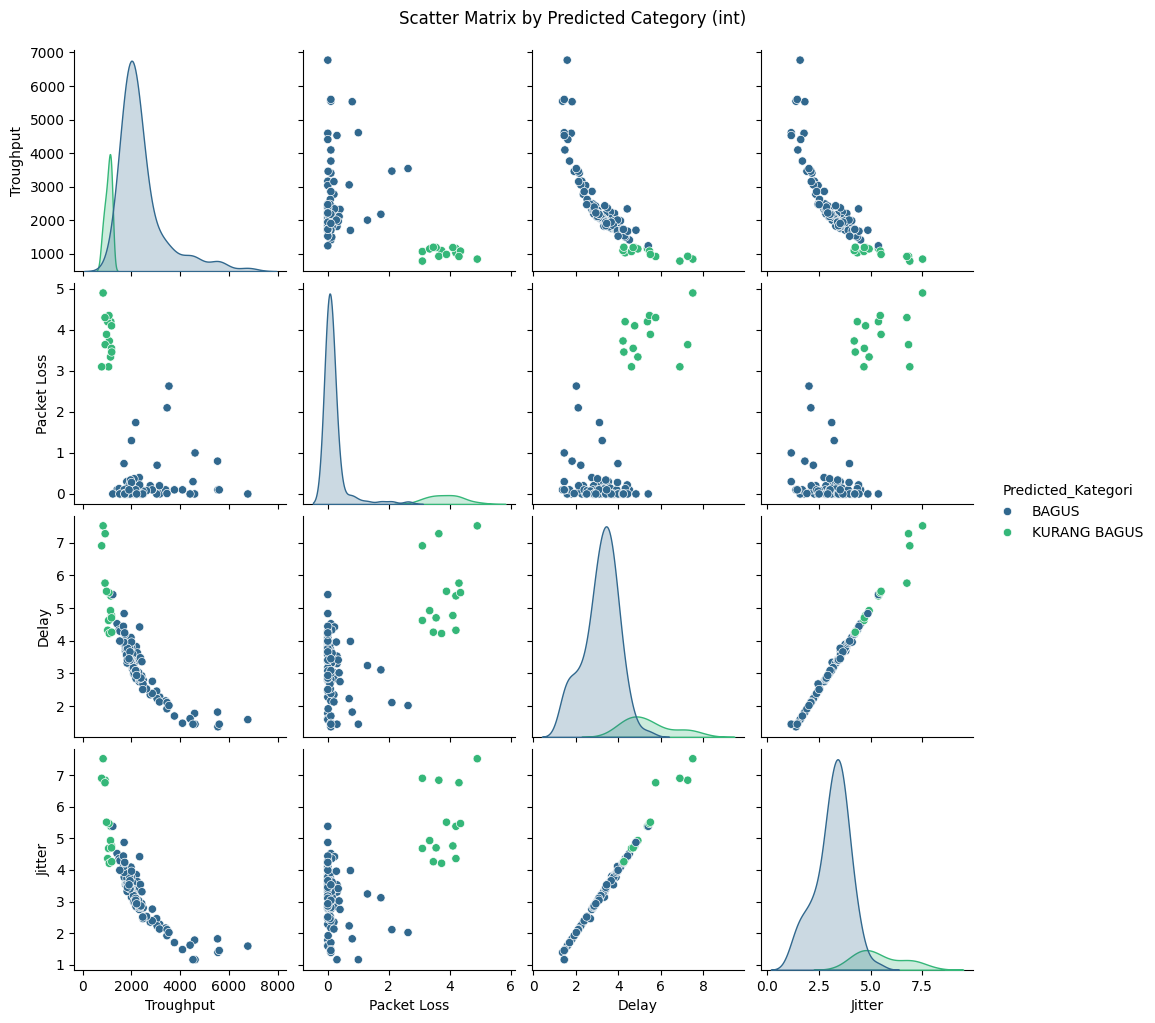

20 	 1.0 	 1.0 	 1.0
   


In [13]:
# prompt: create knn multi-classification for qos input (packet loss, jitter, troughput, delay) output (very nice, nice, cheap nice, poor) with excel data training and excel data testing on different files and visualize it on graph, plot and 4x4 size of confusion matrix

from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Load training data from Excel
train_data = pd.read_excel('data_train_qos.xlsx')
X_train = train_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_train = train_data['Kategori']

# Load testing data from Excel
test_data = pd.read_excel('data_test_qos.xlsx')
X_test = test_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_test = test_data['Kategori']

print("Nilai K",'\t',"accuracy", '\t',"precision", '\t',"recall")
print("   ")

for x in range(1,21):
  # print("Nilai k : ")
  # print(x)
  # Initialize and train the KNN model
  knn_model = KNeighborsClassifier(n_neighbors=x) # You can adjust the number of neighbors
  knn_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn_model.predict(X_test)
  # Create a DataFrame for plotting with predicted categories
  plot_df = X_test.copy()
  plot_df['Predicted_Kategori'] = y_pred

  # Create and display the scatter matrix
  sns.pairplot(plot_df, hue='Predicted_Kategori', palette='viridis')
  plt.suptitle(f'Scatter Matrix by Predicted Category ({type(x).__name__})', y=1.02)
  plt.show()
  # Evaluate the model
  # print(classification_report(y_test, y_pred))
  precision = precision_score(y_test, y_pred,average="macro")
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred,average="macro",zero_division= 1)
  print(x,'\t',accuracy, '\t',precision,'\t',recall)
  print("   ")

  #===================== Confusion Matrix ==================

  # cm = confusion_matrix(y_test, y_pred)
  # plt.figure(figsize=(4, 3))  # Set figure size to 4x4
  # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
  #             # xticklabels=['Very Good', 'Good', 'Not Good', 'Bad'],
  #             # yticklabels=['Very Good', 'Good', 'Not Good', 'Bad'])
  #             xticklabels=['Good', 'Fair', 'Excellent', 'Poor'],
  #             yticklabels=['Good', 'Fair', 'Excellent', 'Poor'])

  # # plt.xlabel('Predicted')
  # # plt.ylabel('Actual')
  # plt.xlabel('Prediksi')
  # plt.ylabel('Aktual')
  # plt.title('Confusion Matrix')
  # plt.show()

  #===================== Confusion Matrix ==================

# print_table([row_data], headers=["Label", "Value1", "Value2"])

#Plot Feature Importance (not directly applicable to KNN in the same way as tree-based models, but can show data distribution)
# for col in ['Troughput', 'Packet Loss', 'Delay', 'Jitter']:
#   plt.figure()
#   sns.histplot(train_data[col], kde=True)
#   plt.title(f'Distribution of {col}')
#   plt.show()

Nilai K 	 accuracy 	 precision 	 recall
   


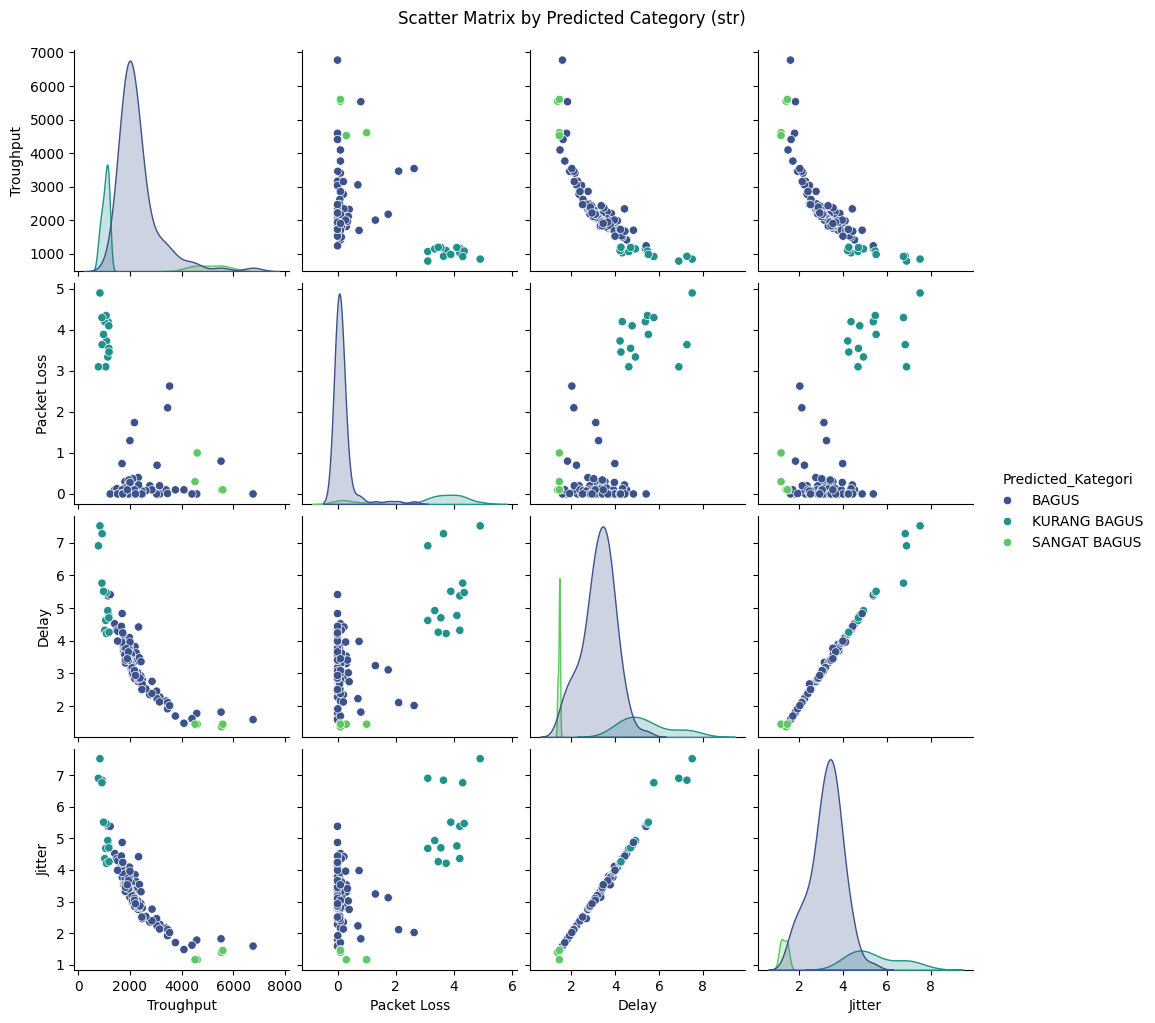

gini 	 0.9652173913043478 	 0.6666666666666666 	 0.9867986798679867
   


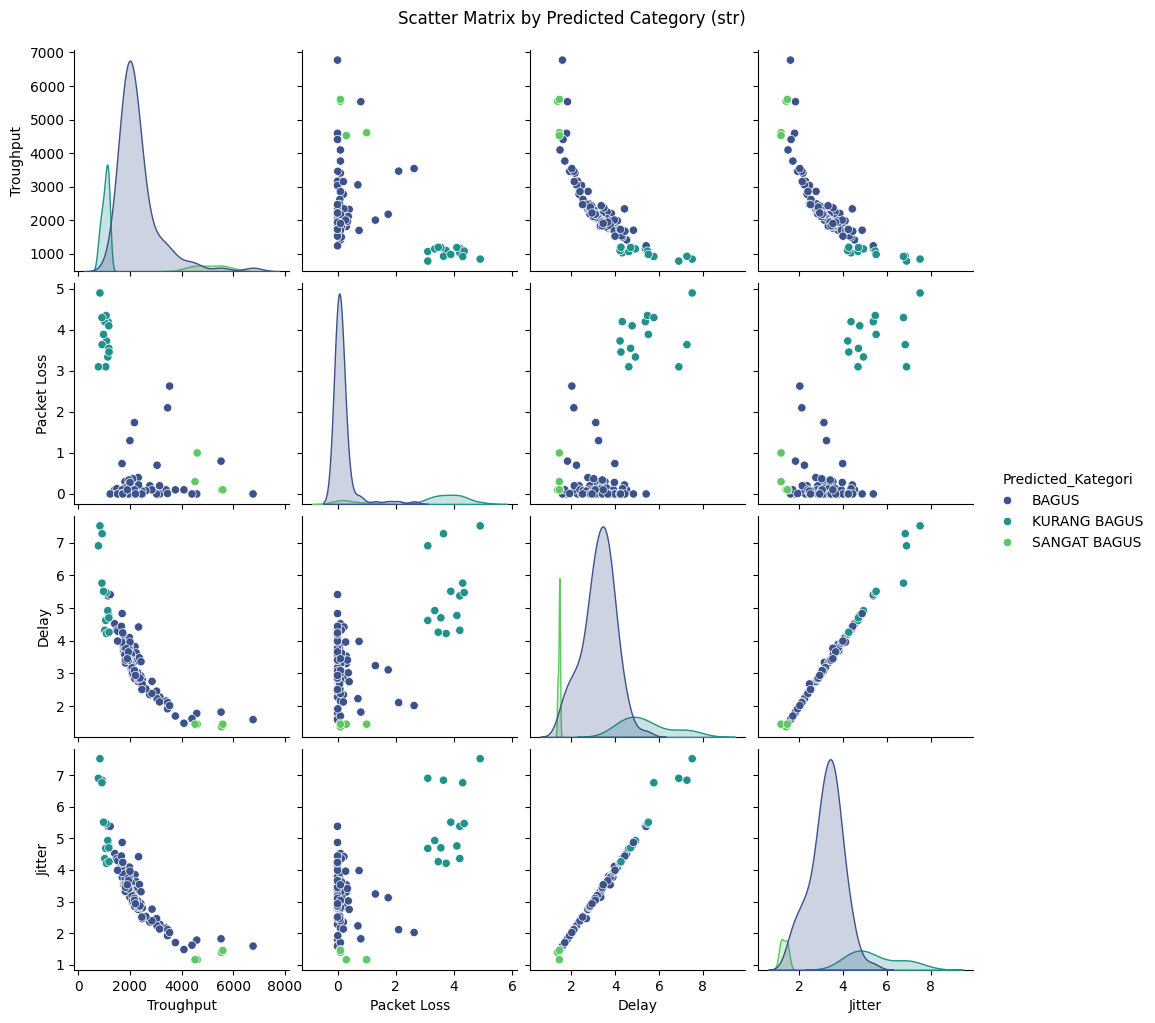

entropy 	 0.9652173913043478 	 0.6666666666666666 	 0.9867986798679867
   


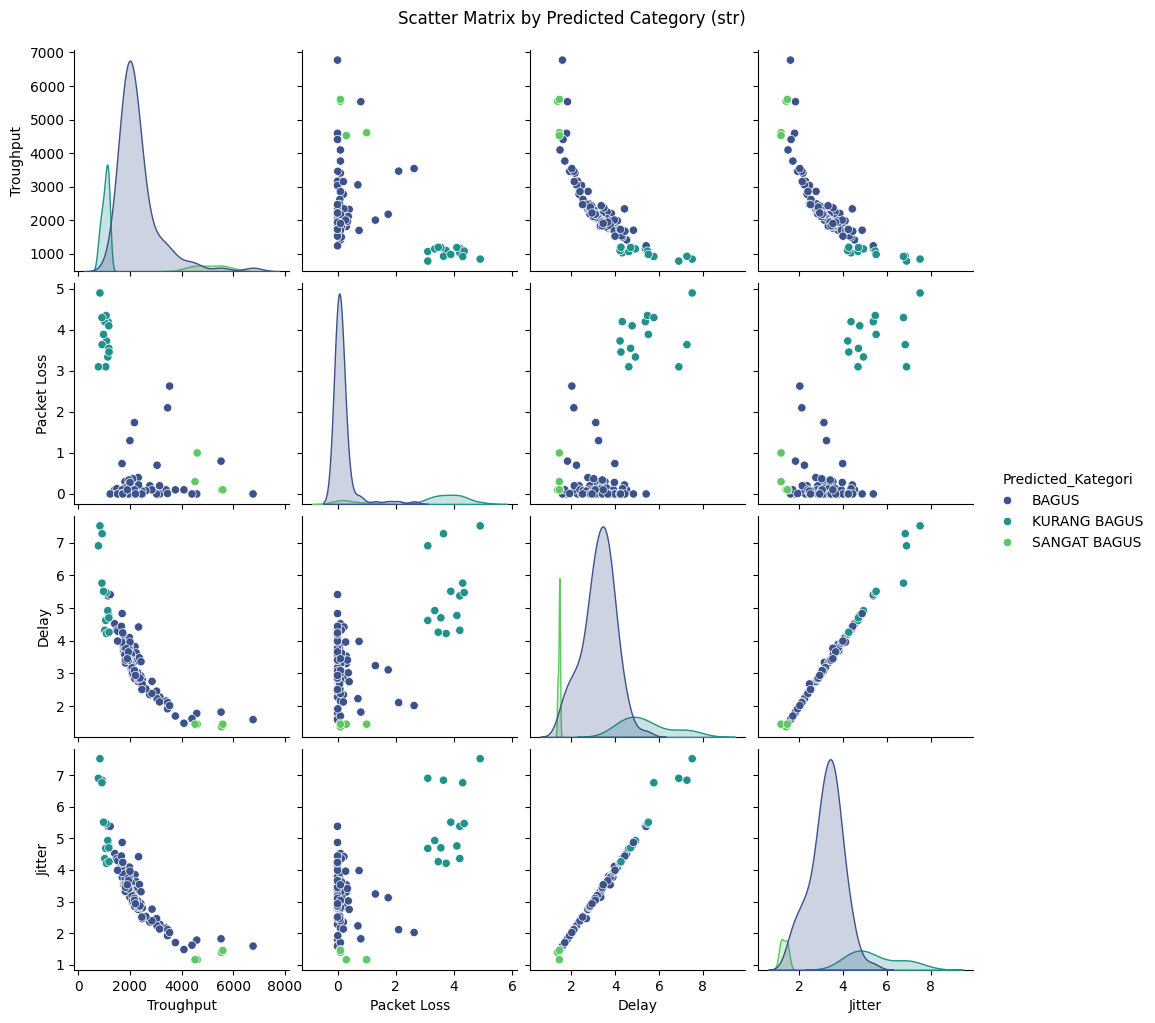

log_loss 	 0.9652173913043478 	 0.6666666666666666 	 0.9867986798679867
   


In [14]:
# prompt: create decision tree multi-classification for qos input (packet loss, jitter, troughput, delay) output (very nice, nice, cheap nice, poor) with excel data training and excel data testing on different files and visualize it on graph, plot and 4x4 size of confusion matrix

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

decision_tree_method = ["gini", "entropy", "log_loss"]

# Load training data from Excel
train_data = pd.read_excel('data_train_qos.xlsx')
X_train = train_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_train = train_data['Kategori']

# Load testing data from Excel
test_data = pd.read_excel('data_test_qos.xlsx')
X_test = test_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_test = test_data['Kategori']

print("Nilai K",'\t',"accuracy", '\t',"precision", '\t',"recall")
print("   ")

for x in decision_tree_method:
  # print(x)

  # Initialize and train the Decision Tree model
  model = DecisionTreeClassifier(criterion=x)
  model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Create a DataFrame for plotting with predicted categories
  plot_df = X_test.copy()
  plot_df['Predicted_Kategori'] = y_pred

  # Create and display the scatter matrix
  sns.pairplot(plot_df, hue='Predicted_Kategori', palette='viridis')
  plt.suptitle(f'Scatter Matrix by Predicted Category ({type(x).__name__})', y=1.02)
  plt.show()

  # Evaluate the model
  # print(classification_report(y_test, y_pred))
  precision = precision_score(y_test, y_pred,average="macro")
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred,average="macro",zero_division= 1)
  print(x,'\t',accuracy, '\t',precision,'\t',recall)
  print("   ")

  # plt.figure(figsize=(12, 8))
  # plot_tree(model, feature_names=X_train.columns, class_names=model.classes_, filled=True, rounded=True)
  # plt.show()

  #===================== Confusion Matrix ==================

  # Create and display the confusion matrix
  # cm = confusion_matrix(y_test, y_pred)
  # plt.figure(figsize=(4, 3))
  # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
  #             # xticklabels=['Very Good', 'Good', 'Not Good', 'Bad'],
  #             # yticklabels=['Very Good', 'Good', 'Not Good', 'Bad'])
  #             xticklabels=['Good', 'Fair', 'Excellent', 'Poor'],
  #             yticklabels=['Good', 'Fair', 'Excellent', 'Poor'])

  # # plt.xlabel('Predicted')
  # # plt.ylabel('Actual')
  # plt.xlabel('Prediksi')
  # plt.ylabel('Aktual')
  # plt.title('Confusion Matrix')
  # plt.show()

  #===================== Confusion Matrix ==================
# # Visualize the decision tree (optional)
# # You might need to install graphviz: !apt-get install graphviz
# # and pydotplus: !pip install pydotplus
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 8))
# plot_tree(model, feature_names=X_train.columns, class_names=model.classes_, filled=True, rounded=True)
# plt.show()


------------------------------
Backup
------------------------------

In [ ]:
# prompt: create naive bayes multi-classification for qos input (packet loss, jitter, troughput, delay) output (very nice, nice, cheap nice, poor) with excel data training and excel data testing on different files and visualize it on graph, plot and 4x4 size of confusion matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load training data from Excel
train_data = pd.read_excel('data_train_qos.xlsx')
X_train = train_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_train = train_data['Kategori']

# Load testing data from Excel
test_data = pd.read_excel('data_test_qos.xlsx')
X_test = test_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_test = test_data['Kategori']

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred.data)
# print(X_test)
# print(y_test)
# print(y_pred)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            # xticklabels=['Very Good', 'Good', 'Not Good', 'Bad'],
            # yticklabels=['Very Good', 'Good', 'Not Good', 'Bad'])
            xticklabels=['Good', 'Fair', 'Excellent', 'Poor'],
            yticklabels=['Good', 'Fair', 'Excellent', 'Poor'])

# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


#Plot Feature Importance (not directly applicable to naive bayes, but can show data distribution)
for col in ['Troughput', 'Packet Loss', 'Delay', 'Jitter']:
  plt.figure()
  sns.histplot(train_data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()


In [ ]:
# prompt: create knn mixedeuclideandistance multi-classification for qos input (packet loss, jitter, troughput, delay) output (very nice, nice, cheap nice, poor) with excel data training and excel data testing on different files and visualize it on graph, plot and 4x4 size of confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load training data from Excel
train_data = pd.read_excel('data_train_qos.xlsx')
X_train = train_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_train = train_data['Kategori']

# Load testing data from Excel
test_data = pd.read_excel('data_test_qos.xlsx')
X_test = test_data[['Troughput', 'Packet Loss', 'Delay', 'Jitter']]
y_test = test_data['Kategori']

# Initialize and train the KNN model with mixed Euclidean distance
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 for euclidean distance
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Fair', 'Excellent', 'Poor'],
            yticklabels=['Good', 'Fair', 'Excellent', 'Poor'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
